In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import os,sys
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense,Input,Flatten,Reshape
from tensorflow.keras.models import Model
from keras import initializers
from tensorflow.keras.optimizers import Adam, SGD, Adagrad, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
import pickle as p


2023-04-08 23:24:19.405268: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=100)

In [3]:

#print('Initializer: ',initializer)

def Upload_Dataset(Dataset_Path):
    
    Path_train_Dataset = Dataset_Path+"/train"
    Path_test_Dataset = Dataset_Path+"/test"
    Path_val_Dataset = Dataset_Path+"/val"
    
    Input_train_Dataset, Input_test_Dataset, Input_val_Dataset = [], [], []
    Output_train, Output_test, Output_val = [], [], []

    for j in os.listdir(Path_train_Dataset):

        if j != ".DS_Store":
            for k in os.listdir(Path_train_Dataset+"/"+j):
                Input_train_Dataset.append(cv2.imread(Path_train_Dataset+"/"+j+"/"+k, cv2.IMREAD_GRAYSCALE))
                if(j == '6'):
                    Output_train.append(int(2))
                elif(j == '7'):
                    Output_train.append(int(3))
                elif(j == '9'):
                    Output_train.append(int(4))
                else:
                    Output_train.append(int(j))

            for k in os.listdir(Path_test_Dataset+"/"+j):
                Input_test_Dataset.append(cv2.imread(Path_test_Dataset+"/"+j+"/"+k, cv2.IMREAD_GRAYSCALE))
                if(j=='6'):
                    Output_test.append(int(2))
                elif(j=='7'):
                    Output_test.append(int(3))
                elif(j=='9'):
                    Output_test.append(int(4))
                else:
                    Output_test.append(int(j))

            for k in os.listdir(Path_val_Dataset+"/"+j):
                Input_val_Dataset.append(cv2.imread(Path_val_Dataset+"/"+j+"/"+k, cv2.IMREAD_GRAYSCALE))
                if(j=='6'):
                    Output_val.append(int(2))
                elif(j=='7'):
                    Output_val.append(int(3))
                elif(j=='9'):
                    Output_val.append(int(4))
                else:
                    Output_val.append(int(j))
        
    #print(Output_train)            
    Input_train_Dataset, Input_test_Dataset, Input_val_Dataset = np.array(Input_train_Dataset), np.array(Input_test_Dataset), np.array(Input_val_Dataset)
    #Output_train, Output_test, Output_val = np.array(list(map(int, Output_train))), np.array(list(map(int, Output_test))), np.array(list(map(int, Output_val)))
    Output_train, Output_test, Output_val = np.array(Output_train), np.array(Output_test), np.array(Output_val)
    #print(Output_train) 
    return Input_train_Dataset, Input_test_Dataset,Input_val_Dataset, Output_train, Output_test, Output_val



#providing path of  MNIST dataset
Dataset_Path = "/Users/vds/Downloads/Group_1"


#calling Upload_Dataset function
Input_train_Dataset, Input_test_Dataset,Input_val_Dataset, Output_train, Output_test, Output_val= Upload_Dataset(Dataset_Path)



In [4]:
Input_train_Dataset=Input_train_Dataset/255
Input_test_Dataset=Input_test_Dataset/255
Input_val_Dataset=Input_val_Dataset/255
#bottleneck dimension
encodingDim=256

In [5]:
#Autoencoder Arch-1
xInp=Input(shape=(28,28),name="img")
inp=Flatten(input_shape=(28, 28), name='InputLayer')(xInp)

hl1a1=Dense(400,activation='sigmoid')(inp)

encodedOut=Dense(encodingDim,activation='sigmoid')(hl1a1)

Encoder1=Model(xInp,encodedOut,name='encoder')

hl3a1=Dense(400,activation='sigmoid')(encodedOut)


decodedOut=Dense(784,activation='sigmoid')(hl3a1)
out=Reshape((28,28))(decodedOut)
optimizer=Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-6,name='Adam')

Autoencoder1=Model(xInp,out,name='AutoencoderA1')
Autoencoder1.summary()

es = EarlyStopping(monitor='loss',min_delta=0.0001, patience=3,verbose=1)

Autoencoder1.compile(optimizer, loss='mse',metrics=['accuracy'])
ae1history=Autoencoder1.fit(x = Input_train_Dataset, y = Input_train_Dataset, batch_size = 32, epochs = 1000, verbose = "auto", callbacks=[es], validation_data=(Input_val_Dataset,  Input_val_Dataset))
#, validation_batch_size=1

Model: "AutoencoderA1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 28, 28)]          0         
                                                                 
 InputLayer (Flatten)        (None, 784)               0         
                                                                 
 dense (Dense)               (None, 400)               314000    
                                                                 
 dense_1 (Dense)             (None, 256)               102656    
                                                                 
 dense_2 (Dense)             (None, 400)               102800    
                                                                 
 dense_3 (Dense)             (None, 784)               314384    
                                                                 
 reshape (Reshape)           (None, 28, 28)          

356/356 [==============================] - 3s 8ms/step - loss: 0.0039 - accuracy: 0.3584 - val_loss: 0.0048 - val_accuracy: 0.3513
Epoch 49/1000
356/356 [==============================] - 4s 11ms/step - loss: 0.0038 - accuracy: 0.3596 - val_loss: 0.0047 - val_accuracy: 0.3516
Epoch 50/1000
356/356 [==============================] - 3s 9ms/step - loss: 0.0038 - accuracy: 0.3597 - val_loss: 0.0047 - val_accuracy: 0.3528
Epoch 51/1000
356/356 [==============================] - 3s 9ms/step - loss: 0.0037 - accuracy: 0.3598 - val_loss: 0.0047 - val_accuracy: 0.3510
Epoch 52/1000
356/356 [==============================] - 3s 10ms/step - loss: 0.0037 - accuracy: 0.3600 - val_loss: 0.0046 - val_accuracy: 0.3524
Epoch 53/1000
356/356 [==============================] - 3s 9ms/step - loss: 0.0036 - accuracy: 0.3603 - val_loss: 0.0046 - val_accuracy: 0.3533
Epoch 54/1000
356/356 [==============================] - 4s 10ms/step - loss: 0.0036 - accuracy: 0.3607 - val_loss: 0.0046 - val_accuracy: 0.3

In [6]:
#Reconstruction Error-2c
print('\nAverage reconstruction Loss :')
trainErr=Autoencoder1.evaluate(x=Input_train_Dataset,y=Input_train_Dataset,batch_size=1, verbose="auto",callbacks=None)
print('Train Data:',trainErr[0])

#print('\nEvaluation of model on validation data:')
valErr=Autoencoder1.evaluate(x=Input_val_Dataset, y=Input_val_Dataset, batch_size=1, verbose="auto",callbacks=None)
print('Validation Data:',valErr[0])

#print('\nEvaluation of model on test data: Average Reconstruction Error')
testErr=Autoencoder1.evaluate(x=Input_test_Dataset, y=Input_test_Dataset, batch_size=1, verbose="auto",callbacks=None)
print('Test Data:',testErr[0])


Average reconstruction Loss :
11385/11385 [==============================] - 9s 780us/step - loss: 0.0030 - accuracy: 0.3658
Train Data: 0.0029880732763558626
3795/3795 [==============================] - 3s 792us/step - loss: 0.0042 - accuracy: 0.3569
Validation Data: 0.00420294189825654
3795/3795 [==============================] - 3s 779us/step - loss: 0.0044 - accuracy: 0.3554
Test Data: 0.004353689961135387


356/356 [==============================] - 1s 1ms/step


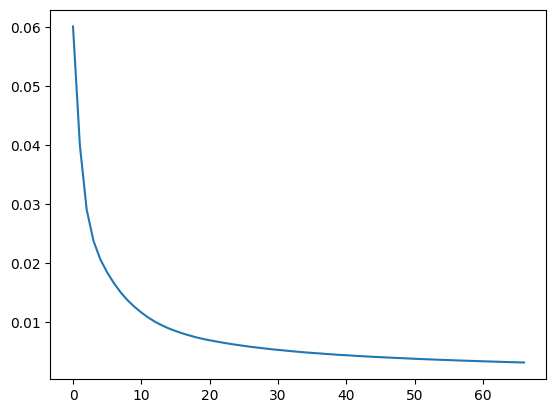

In [7]:
'''visualization-Task2-d'''
#trainReconstruct=Autoencoder1.predict(Input_train_Dataset)
plt.plot(ae1history.history['loss'])

In [49]:
trainReconstruct=Autoencoder1.predict(Input_train_Dataset)
testReconstruct=Autoencoder1.predict(Input_test_Dataset)
valReconstruct=Autoencoder1.predict(Input_val_Dataset)

119/119 [==============================] - 0s 2ms/step


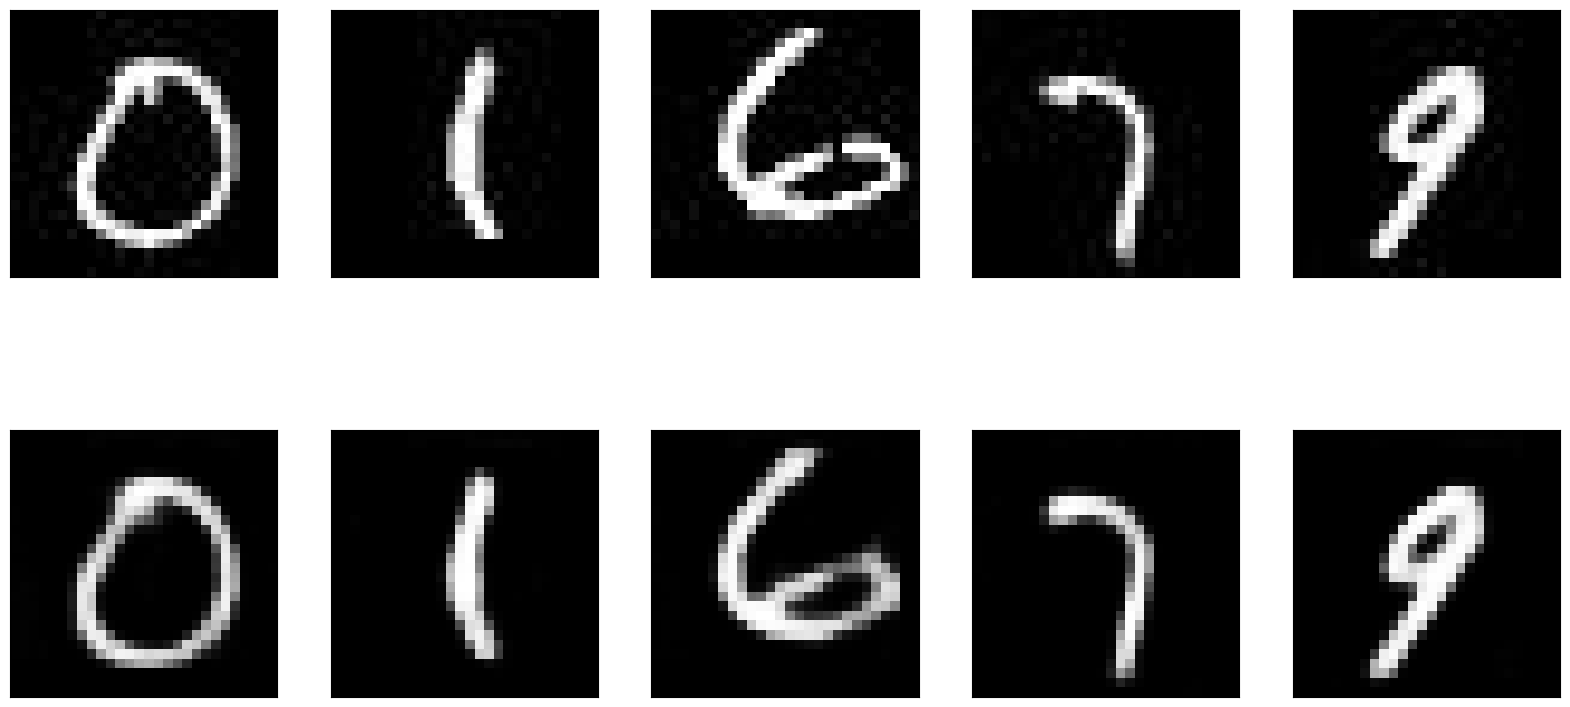

In [53]:
n=5
plt.figure(figsize=(20,10))
for i in range(n):
    #displaying original image
    #clss=n
    idx=np.where(Output_train==i)[0][0]
    ax=plt.subplot(2,n,i+1)
    plt.imshow(Input_train_Dataset[idx].reshape(28,28),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    #displaying reconstructed image
    ax=plt.subplot(2,n,i+1+n)
    plt.imshow(trainReconstruct[idx].reshape(28,28),cmap='gray')
    #plt.imshow(trainEncode[i].reshape(8,8),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


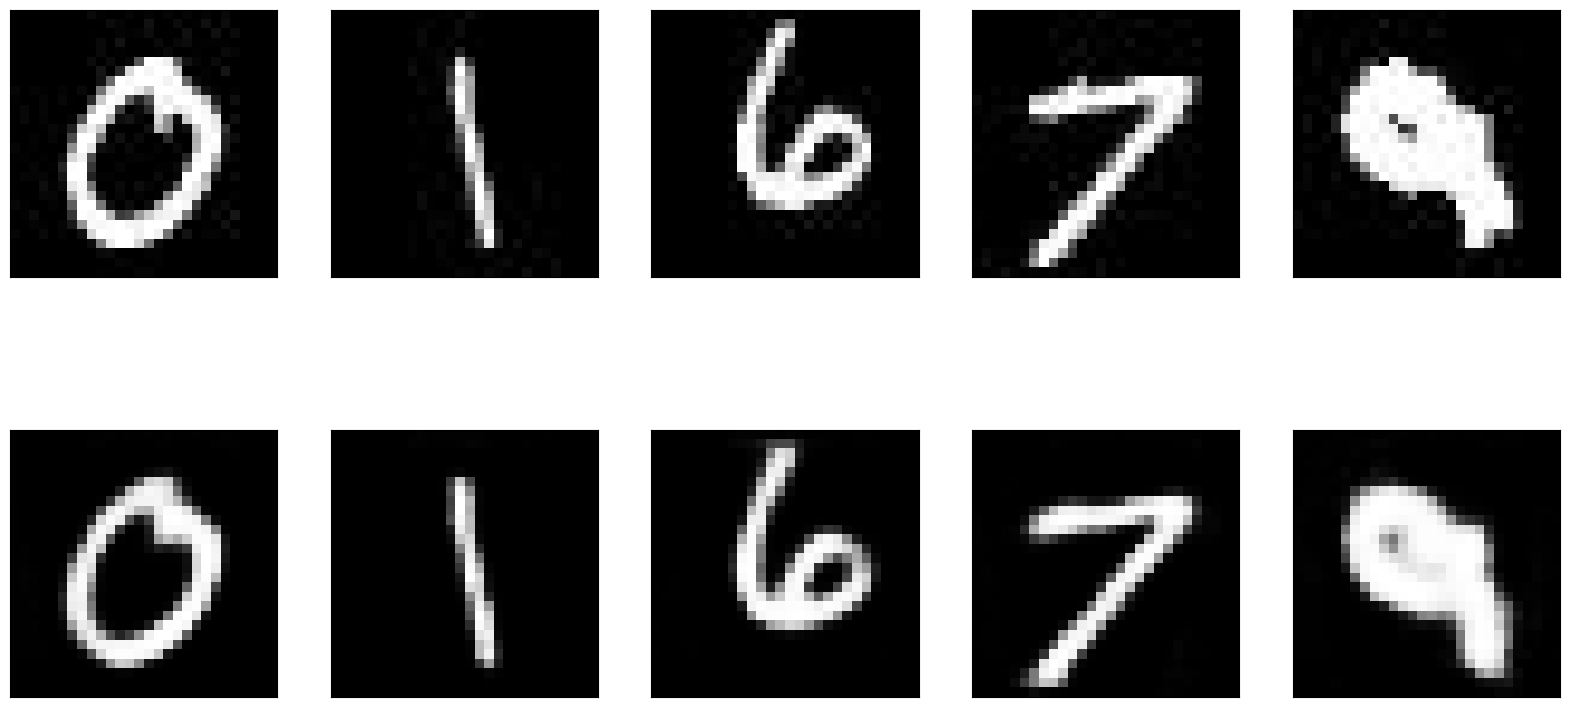

In [51]:
n=5
plt.figure(figsize=(20,10))
for i in range(n):
    #displaying original image
    #clss=n
    idx=np.where(Output_val==i)[0][0]
    ax=plt.subplot(2,n,i+1)
    plt.imshow(Input_val_Dataset[idx].reshape(28,28),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    #displaying reconstructed image
    ax=plt.subplot(2,n,i+1+n)
    plt.imshow(valReconstruct[idx].reshape(28,28),cmap='gray')
    #plt.imshow(trainEncode[i].reshape(8,8),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

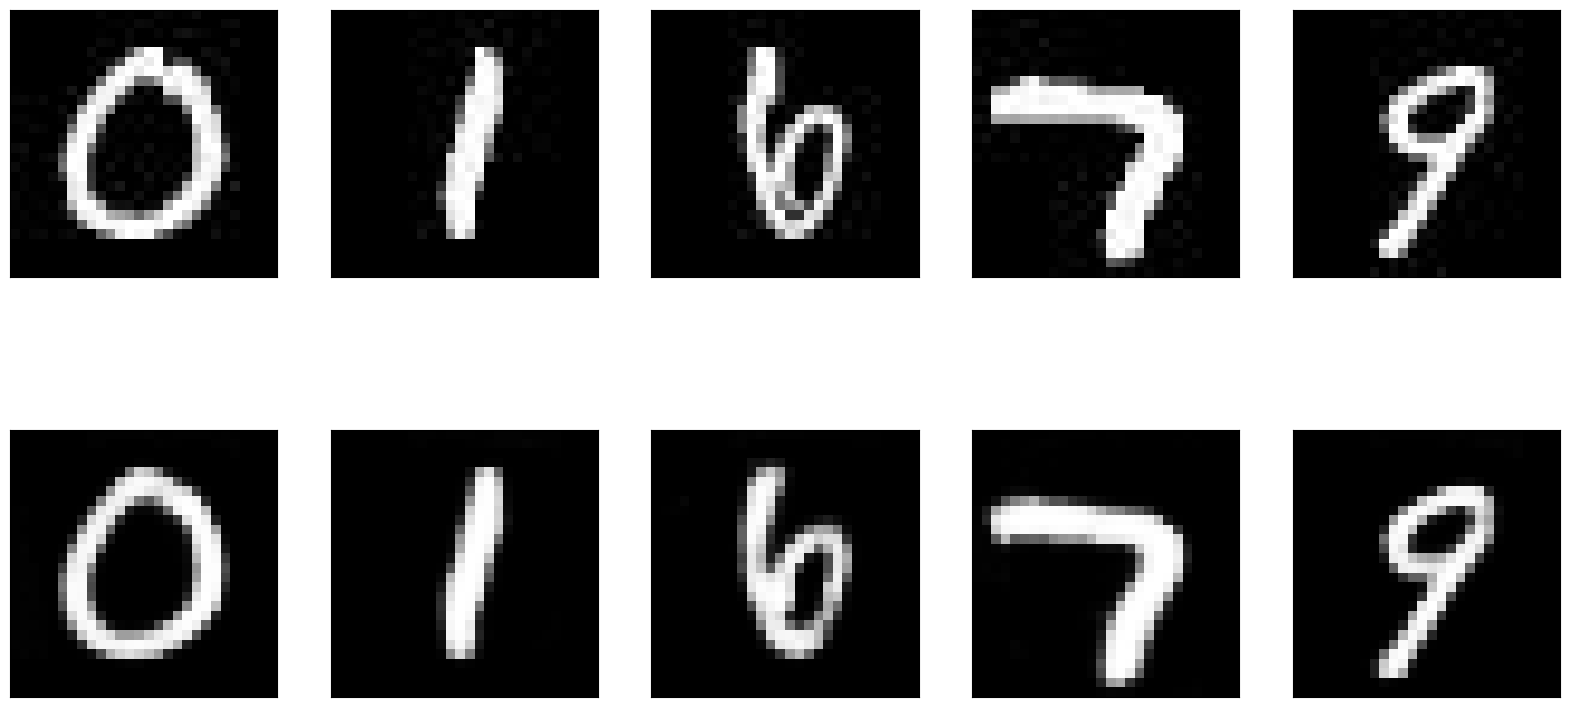

In [52]:
n=5
plt.figure(figsize=(20,10))
for i in range(n):
    #displaying original image
    #clss=n
    idx=np.where(Output_test==i)[0][0]
    ax=plt.subplot(2,n,i+1)
    plt.imshow(Input_test_Dataset[idx].reshape(28,28),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    #displaying reconstructed image
    ax=plt.subplot(2,n,i+1+n)
    plt.imshow(testReconstruct[idx].reshape(28,28),cmap='gray')
    #plt.imshow(trainEncode[i].reshape(8,8),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [65]:
#Task-6
#Since 256 is best encoding dimesion so weight visualization from input to compressed layer:
weights = Autoencoder1.layers[2].get_weights()[0]
print(weights.shape)
print(weights)

(784, 400)
[[-0.03127899 -0.02964798  0.01931324 ... -0.05005531  0.06963426
  -0.03790501]
 [ 0.00268863 -0.00804745 -0.06062384 ... -0.00730752  0.02430049
  -0.03504403]
 [ 0.01736976 -0.02302097 -0.07343366 ...  0.00391549  0.03852583
   0.00688931]
 ...
 [ 0.0333997  -0.0096019  -0.03264969 ... -0.06274289  0.03075083
   0.00823643]
 [ 0.02905812 -0.02497102 -0.03096664 ... -0.02394202 -0.00498336
  -0.00955543]
 [ 0.06735183 -0.04496179  0.04763975 ...  0.04789874 -0.01812487
  -0.04017617]]


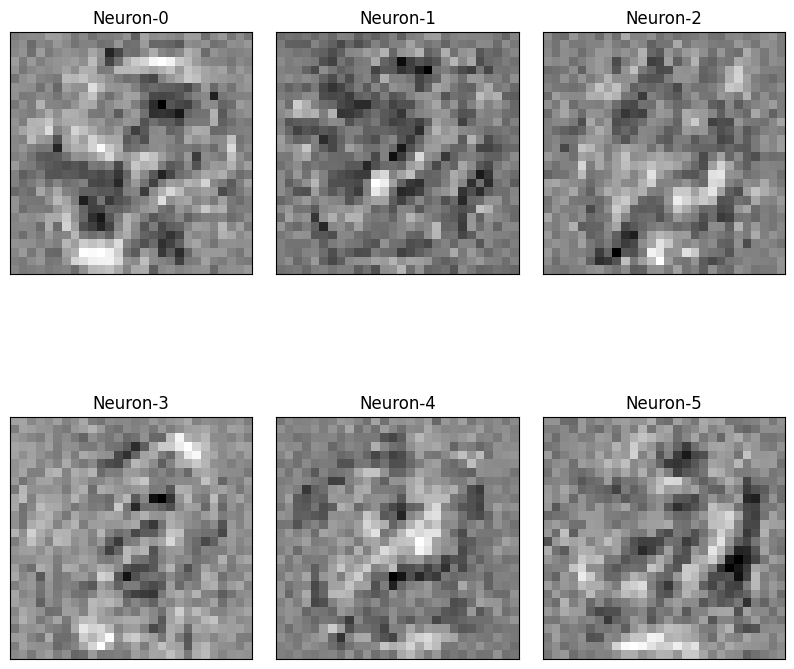

In [66]:
#Visualizing 1st six weights from input to bottleneck layer
n=6
plt.figure(figsize=(10,10))
for i in range(n):
    #displaying original image
    #clss=n
    #idx=np.where(Output_train==i)[0][0]
    ax=plt.subplot(2,3,i+1)
    plt.title('Neuron-'+str(i))
    plt.imshow(weights.T[i].reshape(28,28),cmap='gray')
    plt.subplots_adjust(hspace=0, wspace=0.1)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [ ]:
#Task-6
#Since 256 is best encoding dimesion so weight visualization from input to compressed layer:
weights = Autoencoder1.layers[2].get_weights()[0]
print(weights.shape)
print(weights)

#Visualizing 1st six weights from input to bottleneck layer
n=6
plt.figure(figsize=(10,10))
for i in range(n):
    #displaying original image
    #clss=n
    #idx=np.where(Output_train==i)[0][0]
    ax=plt.subplot(2,3,i+1)
    plt.title('Neuron-'+str(i))
    plt.imshow(weights.T[i].reshape(28,28),cmap='gray')
    plt.subplots_adjust(hspace=0, wspace=0.1)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

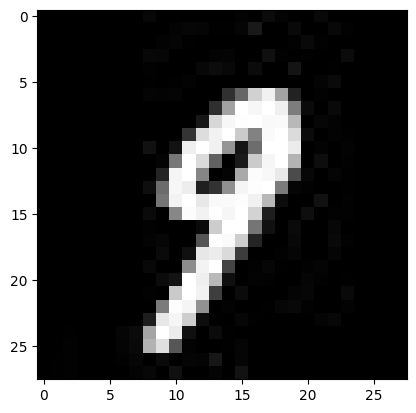

In [9]:
plt.imshow(Input_train_Dataset[0].reshape(28,28),cmap='gray')

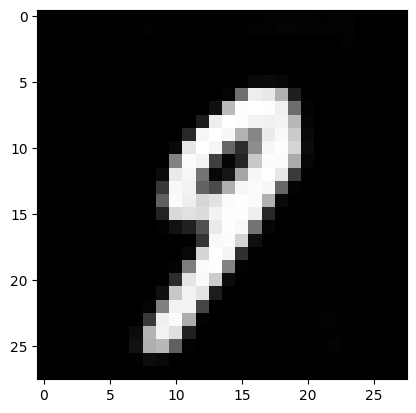

In [10]:
plt.imshow(trainReconstruct[0].reshape(28,28),cmap='gray')

In [11]:
'''Task3'''
#trainEncode=a1Encoder.predict(Input_train_Dataset)
'''Dataset used for prediction and evaluation in FCNN-Encoded data'''
trainEncode=Encoder1.predict(Input_train_Dataset)
valEncode=Encoder1.predict(Input_val_Dataset)
testEncode=Encoder1.predict(Input_test_Dataset)

'''Fcnn'''
model = keras.Sequential([
        #Flatten(input_shape=(28, 28), name='InputLayer'),
        Dense(1024, activation="sigmoid", name="Hlayer1",kernel_initializer=initializer, bias_initializer=initializers.Zeros()),
        Dense(512, activation="sigmoid", name="Hlayer2",kernel_initializer=initializer, bias_initializer=initializers.Zeros()),
        Dense(256, activation="sigmoid", name="Hlayer3",kernel_initializer=initializer, bias_initializer=initializers.Zeros()),
        Dense(5, activation="softmax", name="output"),
        ])
#model.summary()

adam =Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-8,name='Adam')


model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

es = EarlyStopping(monitor='loss',min_delta=0.0001, patience=3,verbose=1)

model_fit = model.fit(x = trainEncode, y = Output_train, batch_size = 32, epochs = 10000, verbose = "auto", callbacks=[es], validation_data=(valEncode,  Output_val), validation_batch_size=1)

model.save('/Users/vds/Downloads/modelAssign4/ae256.h5')
f=open('/Users/vds/Downloads/modelAssign4/Histae256.pckl','wb')
p.dump(model_fit.history,f)
f.close()




119/119 [==============================] - 0s 895us/step
Epoch 1/10000
356/356 [==============================] - 7s 17ms/step - loss: 0.4009 - accuracy: 0.8555 - val_loss: 0.1440 - val_accuracy: 0.9542
Epoch 2/10000
356/356 [==============================] - 6s 16ms/step - loss: 0.1182 - accuracy: 0.9612 - val_loss: 0.1187 - val_accuracy: 0.9597
Epoch 3/10000
356/356 [==============================] - 6s 16ms/step - loss: 0.1012 - accuracy: 0.9670 - val_loss: 0.0959 - val_accuracy: 0.9702
Epoch 4/10000
356/356 [==============================] - 6s 16ms/step - loss: 0.0913 - accuracy: 0.9691 - val_loss: 0.0871 - val_accuracy: 0.9705
Epoch 5/10000
356/356 [==============================] - 6s 16ms/step - loss: 0.0795 - accuracy: 0.9749 - val_loss: 0.0800 - val_accuracy: 0.9729
Epoch 6/10000
356/356 [==============================] - 6s 16ms/step - loss: 0.0647 - accuracy: 0.9782 - val_loss: 0.0658 - val_accuracy: 0.9800
Epoch 7/10000
356/356 [==============================] - 6s 16ms/st

In [12]:
#FCNN Error
print('\nEvaluation of model on train data:')
trainAcc=model.evaluate(x=trainEncode,y=Output_train,batch_size=1, verbose="auto",callbacks=None)
print(model.metrics_names)
print(trainAcc)

print('\nEvaluation of model on validation data:')
valAcc=model.evaluate(x=valEncode, y=Output_val, batch_size=1, verbose="auto",callbacks=None)
print(model.metrics_names)
print(valAcc)

print('\nEvaluation of model on test data:')
testAcc=model.evaluate(x=testEncode, y=Output_test, batch_size=1, verbose="auto",callbacks=None)
print(model.metrics_names)
print(testAcc)

print('\nPredictions for test data:')
testProb=model.predict(testEncode, batch_size=1, verbose="auto", callbacks=None)
pred=np.argmax(testProb,axis=1)
print(pred)

#3-3
#confusionMatrix=confusion_matrix(Output_test, pred)
confusionMatrix=tf.math.confusion_matrix(Output_test,pred)
#confusionMatrix=tf.math.confusion_matrix(Output_test, pred5)
print(confusionMatrix)


Evaluation of model on train data:
11385/11385 [==============================] - 16s 1ms/step - loss: 0.0030 - accuracy: 0.9995
['loss', 'accuracy']
[0.002978649688884616, 0.999472975730896]

Evaluation of model on validation data:
3795/3795 [==============================] - 5s 1ms/step - loss: 0.0503 - accuracy: 0.9884
['loss', 'accuracy']
[0.05031972378492355, 0.9884058237075806]

Evaluation of model on test data:
3795/3795 [==============================] - 4s 1ms/step - loss: 0.0588 - accuracy: 0.9876
['loss', 'accuracy']
[0.058824993669986725, 0.9876152873039246]

Predictions for test data:
3795/3795 [==============================] - 3s 887us/step
[4 4 4 ... 1 1 1]
tf.Tensor(
[[753   1   3   1   1]
 [  1 752   0   6   0]
 [  3   2 752   0   2]
 [  3   2   0 744  10]
 [  5   2   0   5 747]], shape=(5, 5), dtype=int32)


In [13]:
initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=100)

In [14]:
#print('Initializer: ',initializer)

def Upload_Dataset(Dataset_Path):
    
    Path_train_Dataset = Dataset_Path+"/train"
    Path_test_Dataset = Dataset_Path+"/test"
    Path_val_Dataset = Dataset_Path+"/val"
    
    Input_train_Dataset, Input_test_Dataset, Input_val_Dataset = [], [], []
    Output_train, Output_test, Output_val = [], [], []

    for j in os.listdir(Path_train_Dataset):

        if j != ".DS_Store":
            for k in os.listdir(Path_train_Dataset+"/"+j):
                Input_train_Dataset.append(cv2.imread(Path_train_Dataset+"/"+j+"/"+k, cv2.IMREAD_GRAYSCALE))
                if(j == '6'):
                    Output_train.append(int(2))
                elif(j == '7'):
                    Output_train.append(int(3))
                elif(j == '9'):
                    Output_train.append(int(4))
                else:
                    Output_train.append(int(j))

            for k in os.listdir(Path_test_Dataset+"/"+j):
                Input_test_Dataset.append(cv2.imread(Path_test_Dataset+"/"+j+"/"+k, cv2.IMREAD_GRAYSCALE))
                if(j=='6'):
                    Output_test.append(int(2))
                elif(j=='7'):
                    Output_test.append(int(3))
                elif(j=='9'):
                    Output_test.append(int(4))
                else:
                    Output_test.append(int(j))

            for k in os.listdir(Path_val_Dataset+"/"+j):
                Input_val_Dataset.append(cv2.imread(Path_val_Dataset+"/"+j+"/"+k, cv2.IMREAD_GRAYSCALE))
                if(j=='6'):
                    Output_val.append(int(2))
                elif(j=='7'):
                    Output_val.append(int(3))
                elif(j=='9'):
                    Output_val.append(int(4))
                else:
                    Output_val.append(int(j))
        
    #print(Output_train)            
    Input_train_Dataset, Input_test_Dataset, Input_val_Dataset = np.array(Input_train_Dataset), np.array(Input_test_Dataset), np.array(Input_val_Dataset)
    #Output_train, Output_test, Output_val = np.array(list(map(int, Output_train))), np.array(list(map(int, Output_test))), np.array(list(map(int, Output_val)))
    Output_train, Output_test, Output_val = np.array(Output_train), np.array(Output_test), np.array(Output_val)
    #print(Output_train) 
    return Input_train_Dataset, Input_test_Dataset,Input_val_Dataset, Output_train, Output_test, Output_val

In [15]:
#providing path of  MNIST dataset
Dataset_Path = "/Users/vds/Downloads/Group_1"


#calling Upload_Dataset function
Input_train_Dataset, Input_test_Dataset,Input_val_Dataset, Output_train, Output_test, Output_val= Upload_Dataset(Dataset_Path)



Input_train_Dataset=Input_train_Dataset/255
Input_test_Dataset=Input_test_Dataset/255
Input_val_Dataset=Input_val_Dataset/255
#bottleneck dimension
encodingDim2=128

In [16]:
#Autoencoder Arch-1
xInp2=Input(shape=(28,28),name="img")
inp2=Flatten(input_shape=(28, 28), name='InputLayer')(xInp2)

hl1a2=Dense(400,activation='sigmoid')(inp2)

encodedOut2=Dense(encodingDim2,activation='sigmoid')(hl1a2)

Encoder2=Model(xInp2,encodedOut2,name='encoder')

hl3a2=Dense(400,activation='sigmoid')(encodedOut2)

decodedOut2=Dense(784,activation='sigmoid')(hl3a2)
out2=Reshape((28,28))(decodedOut2)
optimizer2=Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-6,name='Adam')

Autoencoder2=Model(xInp2,out2,name='AutoencoderA1')
Autoencoder2.summary()

es = EarlyStopping(monitor='loss',min_delta=0.0001, patience=3,verbose=1)

Autoencoder2.compile(optimizer2, loss='mse',metrics=['accuracy'])
ae2history=Autoencoder2.fit(x = Input_train_Dataset, y = Input_train_Dataset, batch_size = 32, epochs = 1000, verbose = "auto", callbacks=[es], validation_data=(Input_val_Dataset,  Input_val_Dataset))
#, validation_batch_size=1

Model: "AutoencoderA1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 28, 28)]          0         
                                                                 
 InputLayer (Flatten)        (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 400)               314000    
                                                                 
 dense_5 (Dense)             (None, 128)               51328     
                                                                 
 dense_6 (Dense)             (None, 400)               51600     
                                                                 
 dense_7 (Dense)             (None, 784)               314384    
                                                                 
 reshape_1 (Reshape)         (None, 28, 28)          

356/356 [==============================] - 3s 9ms/step - loss: 0.0043 - accuracy: 0.3582 - val_loss: 0.0052 - val_accuracy: 0.3515
Epoch 49/1000
356/356 [==============================] - 4s 10ms/step - loss: 0.0043 - accuracy: 0.3590 - val_loss: 0.0052 - val_accuracy: 0.3522
Epoch 50/1000
356/356 [==============================] - 3s 7ms/step - loss: 0.0042 - accuracy: 0.3589 - val_loss: 0.0051 - val_accuracy: 0.3505
Epoch 51/1000
356/356 [==============================] - 3s 7ms/step - loss: 0.0042 - accuracy: 0.3592 - val_loss: 0.0051 - val_accuracy: 0.3512
Epoch 52/1000
356/356 [==============================] - 3s 8ms/step - loss: 0.0041 - accuracy: 0.3594 - val_loss: 0.0050 - val_accuracy: 0.3516
Epoch 53/1000
356/356 [==============================] - 3s 7ms/step - loss: 0.0041 - accuracy: 0.3593 - val_loss: 0.0050 - val_accuracy: 0.3518
Epoch 54/1000
356/356 [==============================] - 3s 8ms/step - loss: 0.0040 - accuracy: 0.3600 - val_loss: 0.0049 - val_accuracy: 0.352

In [17]:
#Reconstruction Error-2c
print('\nAverage reconstruction Loss :')
trainErr2=Autoencoder2.evaluate(x=Input_train_Dataset,y=Input_train_Dataset,batch_size=1, verbose="auto",callbacks=None)
print('Train Data:',trainErr2[0])

#print('\nEvaluation of model on validation data:')
valErr2=Autoencoder2.evaluate(x=Input_val_Dataset, y=Input_val_Dataset, batch_size=1, verbose="auto",callbacks=None)
print('Validation Data:',valErr2[0])

#print('\nEvaluation of model on test data: Average Reconstruction Error')
testErr2=Autoencoder2.evaluate(x=Input_test_Dataset, y=Input_test_Dataset, batch_size=1, verbose="auto",callbacks=None)
print('Test Data:',testErr2[0])


Average reconstruction Loss :
11385/11385 [==============================] - 10s 853us/step - loss: 0.0032 - accuracy: 0.3653
Train Data: 0.0032219714485108852
3795/3795 [==============================] - 3s 853us/step - loss: 0.0044 - accuracy: 0.3550
Validation Data: 0.004400178324431181
3795/3795 [==============================] - 3s 858us/step - loss: 0.0046 - accuracy: 0.3565
Test Data: 0.004564695060253143


356/356 [==============================] - 1s 1ms/step


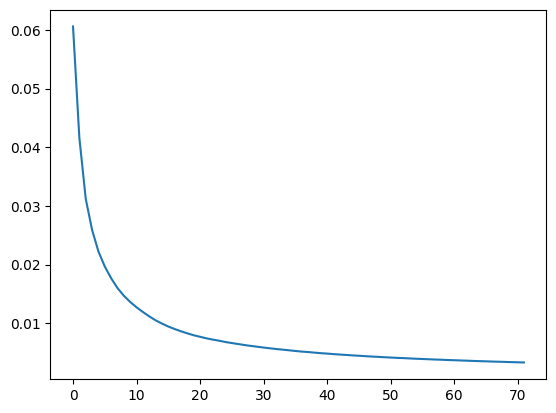

In [18]:
'''visualization-Task2-d'''
trainReconstruct2=Autoencoder2.predict(Input_train_Dataset)
plt.plot(ae2history.history['loss'])

In [54]:
'''visualization-Task2-d'''
trainReconstruct2=Autoencoder2.predict(Input_train_Dataset)
testReconstruct2=Autoencoder2.predict(Input_test_Dataset)
valReconstruct2=Autoencoder2.predict(Input_val_Dataset)

119/119 [==============================] - 0s 2ms/step


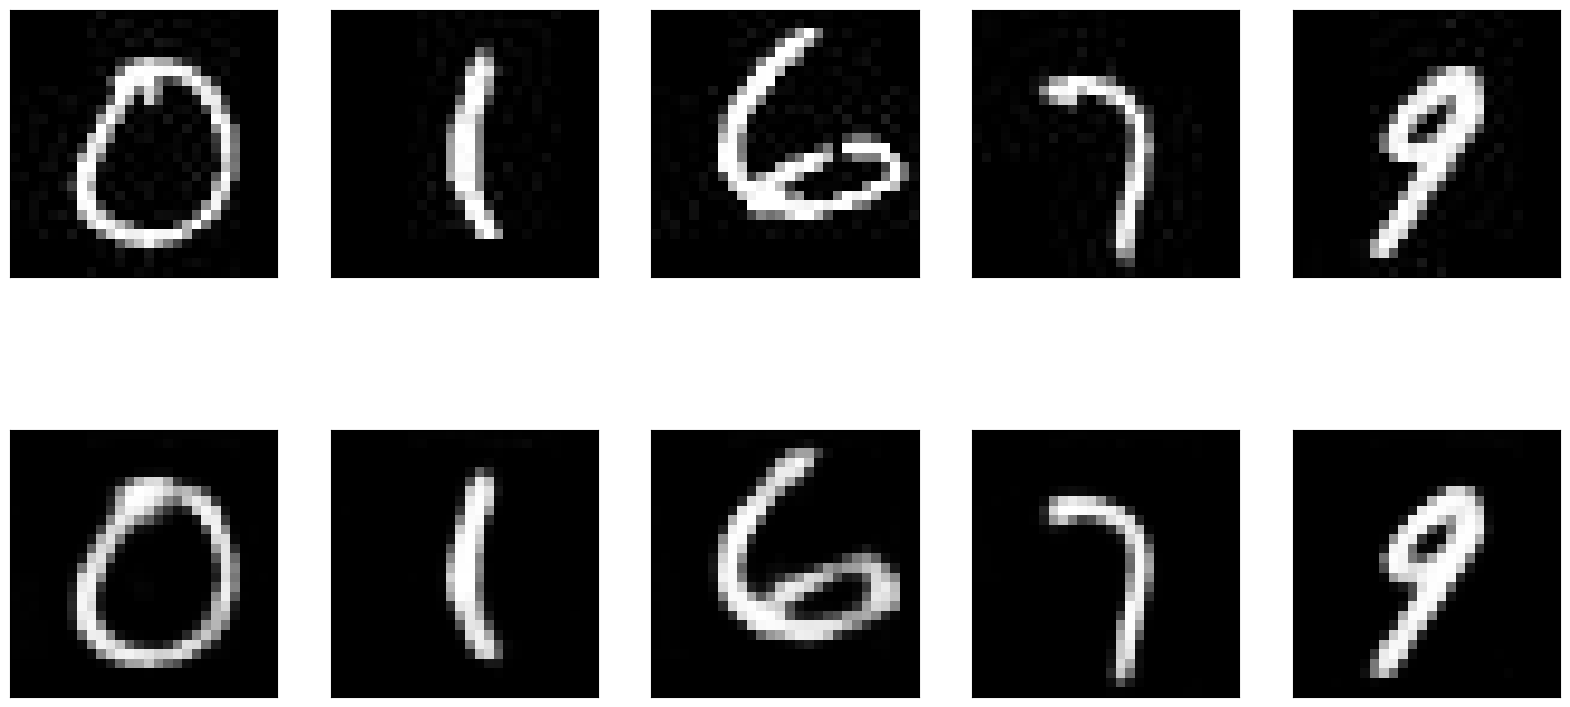

In [58]:
n=5
plt.figure(figsize=(20,10))
for i in range(n):
    #displaying original image
    #clss=n
    idx=np.where(Output_train==i)[0][0]
    ax=plt.subplot(2,n,i+1)
    plt.imshow(Input_train_Dataset[idx].reshape(28,28),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    #displaying reconstructed image
    ax=plt.subplot(2,n,i+1+n)
    plt.imshow(trainReconstruct2[idx].reshape(28,28),cmap='gray')
    #plt.imshow(trainEncode[i].reshape(8,8),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

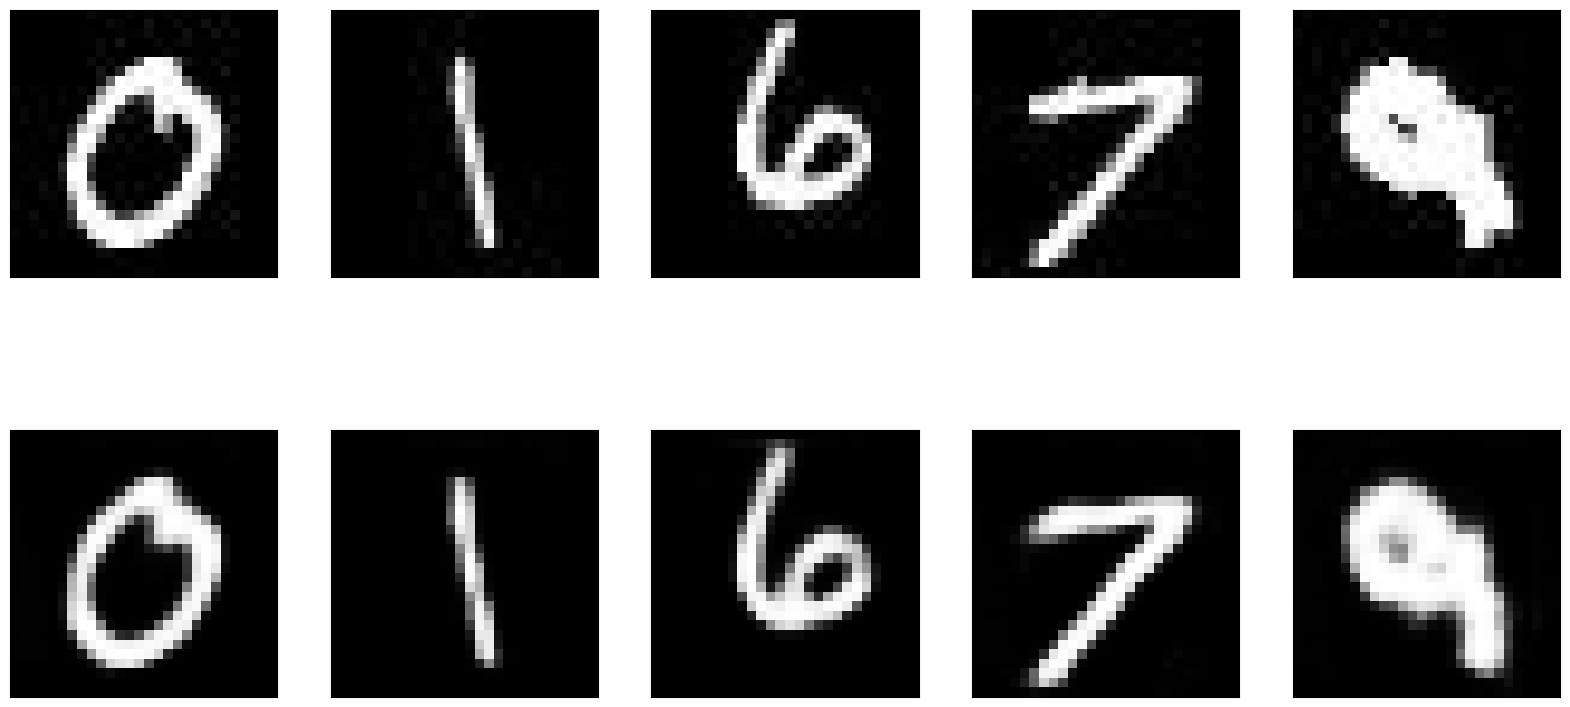

In [59]:
n=5
plt.figure(figsize=(20,10))
for i in range(n):
    #displaying original image
    #clss=n
    idx=np.where(Output_val==i)[0][0]
    ax=plt.subplot(2,n,i+1)
    plt.imshow(Input_val_Dataset[idx].reshape(28,28),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    #displaying reconstructed image
    ax=plt.subplot(2,n,i+1+n)
    plt.imshow(valReconstruct2[idx].reshape(28,28),cmap='gray')
    #plt.imshow(trainEncode[i].reshape(8,8),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

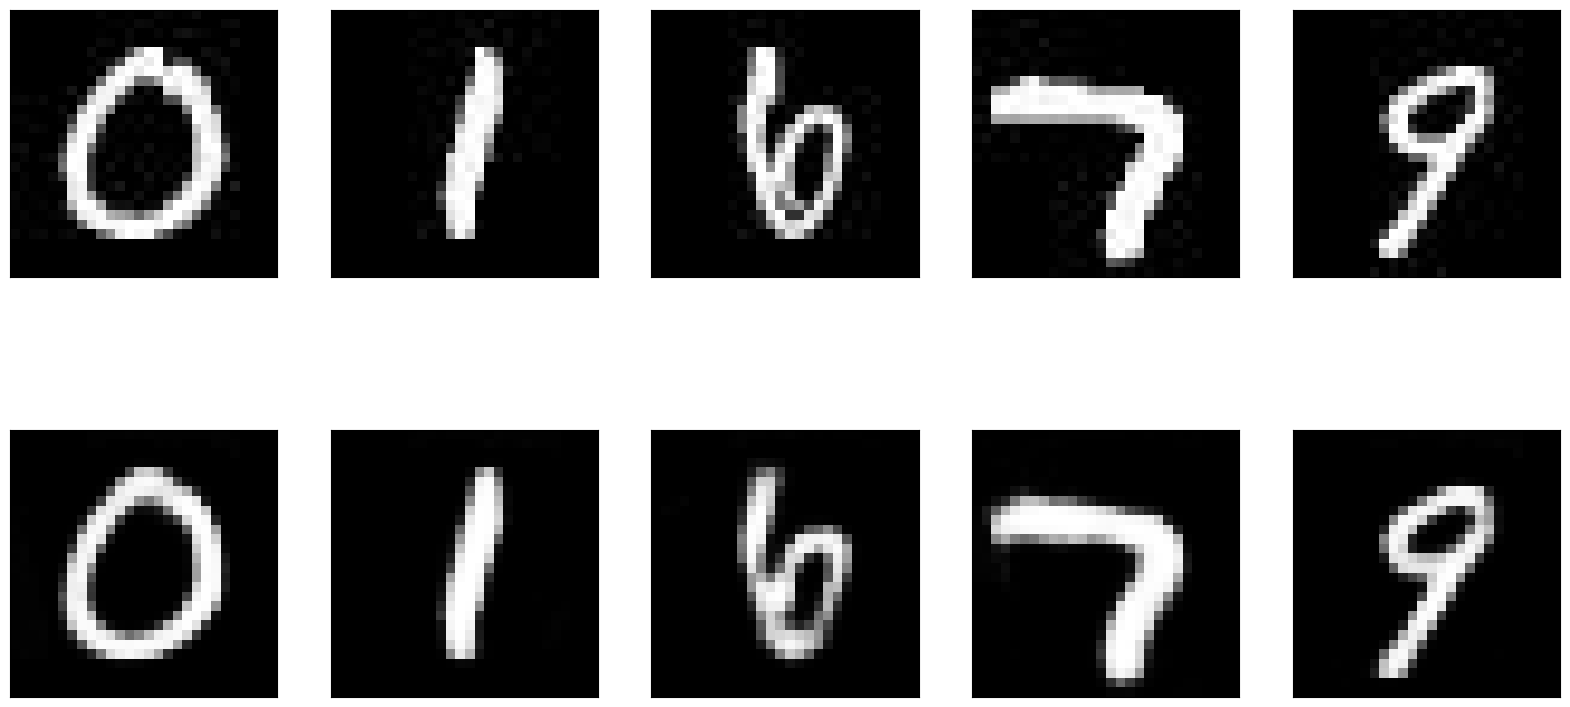

In [60]:
n=5
plt.figure(figsize=(20,10))
for i in range(n):
    #displaying original image
    #clss=n
    idx=np.where(Output_test==i)[0][0]
    ax=plt.subplot(2,n,i+1)
    plt.imshow(Input_test_Dataset[idx].reshape(28,28),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    #displaying reconstructed image
    ax=plt.subplot(2,n,i+1+n)
    plt.imshow(testReconstruct2[idx].reshape(28,28),cmap='gray')
    #plt.imshow(trainEncode[i].reshape(8,8),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [21]:
#Task3
#trainEncode=a1Encoder.predict(Input_train_Dataset)
'''Dataset used for prediction and evaluation in FCNN-Encoded data'''
trainEncode2=Encoder2.predict(Input_train_Dataset)
valEncode2=Encoder2.predict(Input_val_Dataset)
testEncode2=Encoder2.predict(Input_test_Dataset)

#Fcnn
model2 = keras.Sequential([
        #Flatten(input_shape=(28, 28), name='InputLayer'),
        Dense(1024, activation="sigmoid", name="Hlayer1",kernel_initializer=initializer, bias_initializer=initializers.Zeros()),
        Dense(512, activation="sigmoid", name="Hlayer2",kernel_initializer=initializer, bias_initializer=initializers.Zeros()),
        Dense(256, activation="sigmoid", name="Hlayer3",kernel_initializer=initializer, bias_initializer=initializers.Zeros()),
        Dense(5, activation="softmax", name="output"),
        ])
#model.summary()

adam =Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-8,name='Adam')


model2.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

es = EarlyStopping(monitor='loss',min_delta=0.0001, patience=3,verbose=1)

model_fit2 = model2.fit(x = trainEncode2, y = Output_train, batch_size = 32, epochs = 10000, verbose = "auto", callbacks=[es], validation_data=(valEncode2,  Output_val), validation_batch_size=1)

model2.save('/Users/vds/Downloads/modelAssign4/ae128.h5')
f=open('/Users/vds/Downloads/modelAssign4/Histae128.pckl','wb')
p.dump(model_fit2.history,f)
f.close()

119/119 [==============================] - 0s 1ms/step
Epoch 1/10000
356/356 [==============================] - 7s 17ms/step - loss: 0.5004 - accuracy: 0.8060 - val_loss: 0.1414 - val_accuracy: 0.9544
Epoch 2/10000
356/356 [==============================] - 6s 16ms/step - loss: 0.1398 - accuracy: 0.9527 - val_loss: 0.1201 - val_accuracy: 0.9597
Epoch 3/10000
356/356 [==============================] - 5s 15ms/step - loss: 0.1121 - accuracy: 0.9624 - val_loss: 0.1284 - val_accuracy: 0.9589
Epoch 4/10000
356/356 [==============================] - 6s 16ms/step - loss: 0.1046 - accuracy: 0.9649 - val_loss: 0.0895 - val_accuracy: 0.9718
Epoch 5/10000
356/356 [==============================] - 5s 15ms/step - loss: 0.0972 - accuracy: 0.9672 - val_loss: 0.1134 - val_accuracy: 0.9647
Epoch 6/10000
356/356 [==============================] - 5s 15ms/step - loss: 0.0964 - accuracy: 0.9672 - val_loss: 0.0993 - val_accuracy: 0.9700
Epoch 7/10000
356/356 [==============================] - 5s 15ms/step

In [22]:
trainEncode2.shape

(11385, 128)

In [23]:
#FCNN Error
print('\nEvaluation of model on train data:')
trainAcc2=model2.evaluate(x=trainEncode2,y=Output_train,batch_size=1, verbose="auto",callbacks=None)
print(model2.metrics_names)
print(trainAcc2)

print('\nEvaluation of model on validation data:')
valAcc2=model2.evaluate(x=valEncode2, y=Output_val, batch_size=1, verbose="auto",callbacks=None)
print(model2.metrics_names)
print(valAcc2)

print('\nEvaluation of model on test data:')
testAcc2=model2.evaluate(x=testEncode2, y=Output_test, batch_size=1, verbose="auto",callbacks=None)
print(model2.metrics_names)
print(testAcc2)

print('\nPredictions for test data:')
testProb2=model2.predict(testEncode2, batch_size=1, verbose="auto", callbacks=None)
pred2=np.argmax(testProb2,axis=1)
print(pred2)


Evaluation of model on train data:
11385/11385 [==============================] - 9s 791us/step - loss: 0.0076 - accuracy: 0.9975
['loss', 'accuracy']
[0.007641153875738382, 0.9974527955055237]

Evaluation of model on validation data:
3795/3795 [==============================] - 3s 787us/step - loss: 0.0602 - accuracy: 0.9847
['loss', 'accuracy']
[0.060168903321027756, 0.9847167134284973]

Evaluation of model on test data:
3795/3795 [==============================] - 3s 792us/step - loss: 0.0716 - accuracy: 0.9842
['loss', 'accuracy']
[0.07155324518680573, 0.9841897487640381]

Predictions for test data:
3795/3795 [==============================] - 3s 670us/step
[4 4 4 ... 1 1 1]


In [24]:
#3-3
#confusionMatrix=confusion_matrix(Output_test, pred)
confusionMatrix2=tf.math.confusion_matrix(Output_test,pred2)
#confusionMatrix=tf.math.confusion_matrix(Output_test, pred5)
print(confusionMatrix2)

tf.Tensor(
[[753   0   5   0   1]
 [  1 754   0   4   0]
 [  6   2 751   0   0]
 [  1   4   3 746   5]
 [  7   4   0  17 731]], shape=(5, 5), dtype=int32)


In [25]:
initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=100)

In [26]:
#print('Initializer: ',initializer)

def Upload_Dataset(Dataset_Path):
    
    Path_train_Dataset = Dataset_Path+"/train"
    Path_test_Dataset = Dataset_Path+"/test"
    Path_val_Dataset = Dataset_Path+"/val"
    
    Input_train_Dataset, Input_test_Dataset, Input_val_Dataset = [], [], []
    Output_train, Output_test, Output_val = [], [], []

    for j in os.listdir(Path_train_Dataset):

        if j != ".DS_Store":
            for k in os.listdir(Path_train_Dataset+"/"+j):
                Input_train_Dataset.append(cv2.imread(Path_train_Dataset+"/"+j+"/"+k, cv2.IMREAD_GRAYSCALE))
                if(j == '6'):
                    Output_train.append(int(2))
                elif(j == '7'):
                    Output_train.append(int(3))
                elif(j == '9'):
                    Output_train.append(int(4))
                else:
                    Output_train.append(int(j))

            for k in os.listdir(Path_test_Dataset+"/"+j):
                Input_test_Dataset.append(cv2.imread(Path_test_Dataset+"/"+j+"/"+k, cv2.IMREAD_GRAYSCALE))
                if(j=='6'):
                    Output_test.append(int(2))
                elif(j=='7'):
                    Output_test.append(int(3))
                elif(j=='9'):
                    Output_test.append(int(4))
                else:
                    Output_test.append(int(j))

            for k in os.listdir(Path_val_Dataset+"/"+j):
                Input_val_Dataset.append(cv2.imread(Path_val_Dataset+"/"+j+"/"+k, cv2.IMREAD_GRAYSCALE))
                if(j=='6'):
                    Output_val.append(int(2))
                elif(j=='7'):
                    Output_val.append(int(3))
                elif(j=='9'):
                    Output_val.append(int(4))
                else:
                    Output_val.append(int(j))
        
    #print(Output_train)            
    Input_train_Dataset, Input_test_Dataset, Input_val_Dataset = np.array(Input_train_Dataset), np.array(Input_test_Dataset), np.array(Input_val_Dataset)
    #Output_train, Output_test, Output_val = np.array(list(map(int, Output_train))), np.array(list(map(int, Output_test))), np.array(list(map(int, Output_val)))
    Output_train, Output_test, Output_val = np.array(Output_train), np.array(Output_test), np.array(Output_val)
    #print(Output_train) 
    return Input_train_Dataset, Input_test_Dataset,Input_val_Dataset, Output_train, Output_test, Output_val



#providing path of  MNIST dataset
Dataset_Path = "/Users/vds/Downloads/Group_1"

In [27]:
#calling Upload_Dataset function
Input_train_Dataset, Input_test_Dataset,Input_val_Dataset, Output_train, Output_test, Output_val= Upload_Dataset(Dataset_Path)



Input_train_Dataset=Input_train_Dataset/255
Input_test_Dataset=Input_test_Dataset/255
Input_val_Dataset=Input_val_Dataset/255
#bottleneck dimension
encodingDim3=64

In [28]:
#Autoencoder Arch-1
xInp3=Input(shape=(28,28),name="img")
inp3=Flatten(input_shape=(28, 28), name='InputLayer')(xInp3)

hl1a3=Dense(400,activation='sigmoid')(inp3)

encodedOut3=Dense(encodingDim3,activation='sigmoid')(hl1a3)

Encoder3=Model(xInp3,encodedOut3,name='encoder')

hl3a3=Dense(400,activation='sigmoid')(encodedOut3)

decodedOut3=Dense(784,activation='sigmoid')(hl3a3)

#decodedOut3=Dense(784,activation='sigmoid')(encodedOut3)
out3=Reshape((28,28))(decodedOut3)
optimizer3=Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-6,name='Adam')

Autoencoder3=Model(xInp3,out3,name='AutoencoderA1')
Autoencoder3.summary()

es = EarlyStopping(monitor='loss',min_delta=0.0001, patience=3,verbose=1)

Autoencoder3.compile(optimizer3, loss='mse',metrics=['accuracy'])
ae3history=Autoencoder3.fit(x = Input_train_Dataset, y = Input_train_Dataset, batch_size = 32, epochs = 1000, verbose = "auto", callbacks=[es], validation_data=(Input_val_Dataset,  Input_val_Dataset))
#, validation_batch_size=1

Model: "AutoencoderA1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 28, 28)]          0         
                                                                 
 InputLayer (Flatten)        (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 400)               314000    
                                                                 
 dense_9 (Dense)             (None, 64)                25664     
                                                                 
 dense_10 (Dense)            (None, 400)               26000     
                                                                 
 dense_11 (Dense)            (None, 784)               314384    
                                                                 
 reshape_2 (Reshape)         (None, 28, 28)          

356/356 [==============================] - 2s 7ms/step - loss: 0.0051 - accuracy: 0.3526 - val_loss: 0.0060 - val_accuracy: 0.3464
Epoch 49/1000
356/356 [==============================] - 2s 7ms/step - loss: 0.0051 - accuracy: 0.3531 - val_loss: 0.0059 - val_accuracy: 0.3469
Epoch 50/1000
356/356 [==============================] - 3s 7ms/step - loss: 0.0050 - accuracy: 0.3528 - val_loss: 0.0058 - val_accuracy: 0.3467
Epoch 51/1000
356/356 [==============================] - 3s 8ms/step - loss: 0.0049 - accuracy: 0.3533 - val_loss: 0.0057 - val_accuracy: 0.3459
Epoch 52/1000
356/356 [==============================] - 2s 7ms/step - loss: 0.0049 - accuracy: 0.3536 - val_loss: 0.0058 - val_accuracy: 0.3475
Epoch 53/1000
356/356 [==============================] - 3s 8ms/step - loss: 0.0048 - accuracy: 0.3535 - val_loss: 0.0056 - val_accuracy: 0.3470
Epoch 54/1000
356/356 [==============================] - 3s 7ms/step - loss: 0.0048 - accuracy: 0.3539 - val_loss: 0.0056 - val_accuracy: 0.3485

In [29]:
#Reconstruction Error-2c
print('\nAverage reconstruction Loss :')
trainErr3=Autoencoder3.evaluate(x=Input_train_Dataset,y=Input_train_Dataset,batch_size=1, verbose="auto",callbacks=None)
print('Train Data:',trainErr3[0])

#print('\nEvaluation of model on validation data:')
valErr3=Autoencoder3.evaluate(x=Input_val_Dataset, y=Input_val_Dataset, batch_size=1, verbose="auto",callbacks=None)
print('Validation Data:',valErr3[0])

#print('\nEvaluation of model on test data: Average Reconstruction Error')
testErr3=Autoencoder3.evaluate(x=Input_test_Dataset, y=Input_test_Dataset, batch_size=1, verbose="auto",callbacks=None)
print('Test Data:',testErr3[0])


Average reconstruction Loss :
11385/11385 [==============================] - 11s 956us/step - loss: 0.0037 - accuracy: 0.3595
Train Data: 0.00371404062025249
3795/3795 [==============================] - 4s 1ms/step - loss: 0.0049 - accuracy: 0.3500
Validation Data: 0.004863416776061058
3795/3795 [==============================] - 4s 1ms/step - loss: 0.0051 - accuracy: 0.3510
Test Data: 0.005070674233138561


356/356 [==============================] - 1s 1ms/step


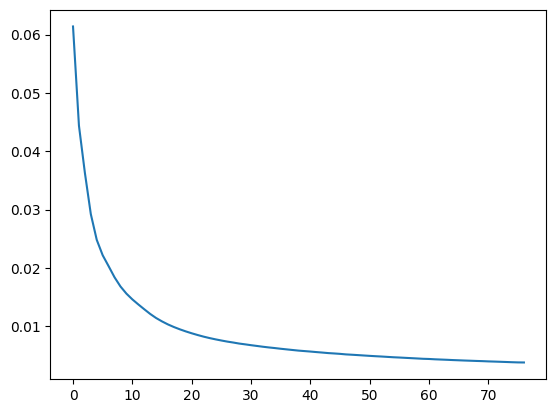

In [30]:
'''visualization-Task2-d'''
trainReconstruct3=Autoencoder3.predict(Input_train_Dataset)
plt.plot(ae3history.history['loss'])

In [61]:
'''visualization-Task2-d'''
trainReconstruct3=Autoencoder3.predict(Input_train_Dataset)
valReconstruct3=Autoencoder3.predict(Input_val_Dataset)
testReconstruct3=Autoencoder3.predict(Input_test_Dataset)

119/119 [==============================] - 0s 2ms/step


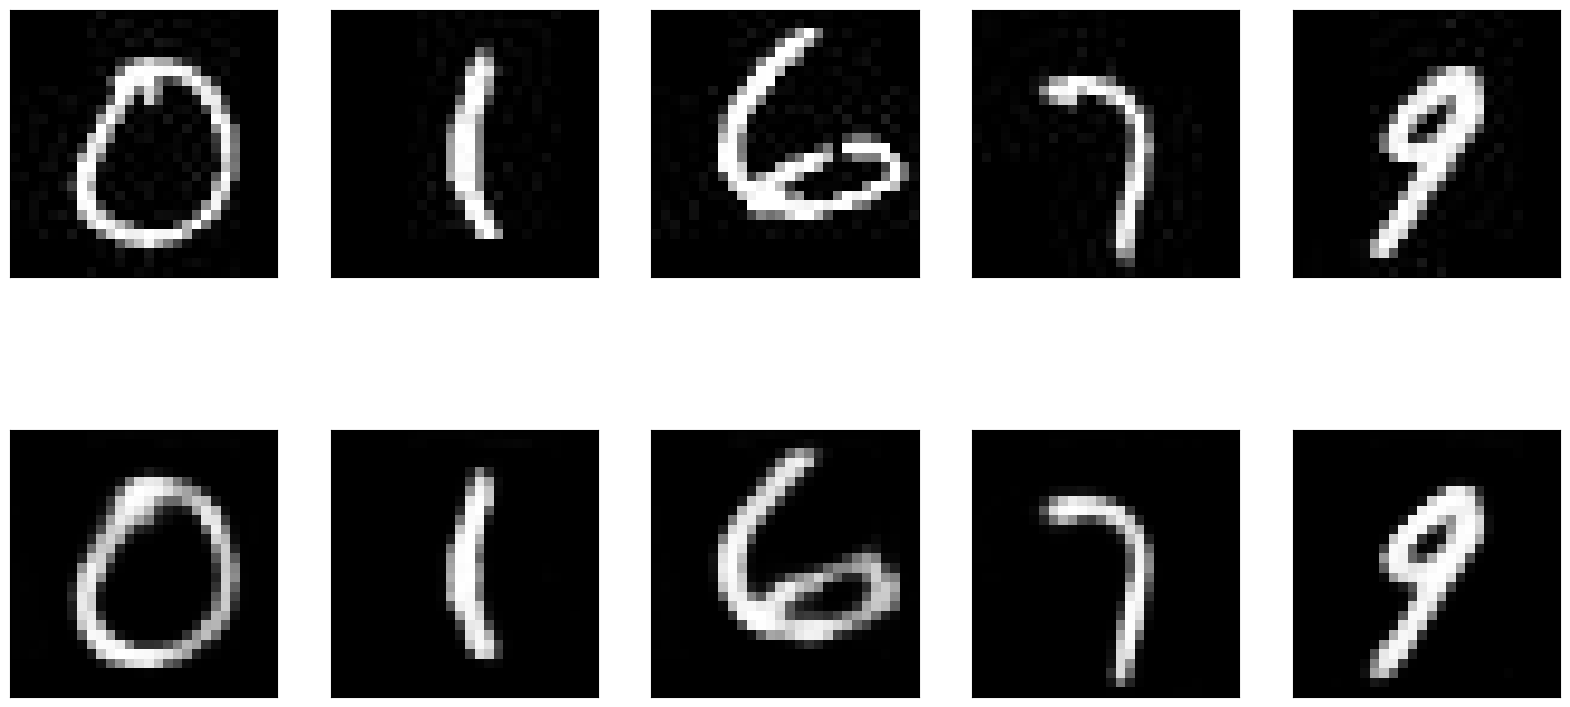

In [62]:
n=5
plt.figure(figsize=(20,10))
for i in range(n):
    #displaying original image
    #clss=n
    idx=np.where(Output_train==i)[0][0]
    ax=plt.subplot(2,n,i+1)
    plt.imshow(Input_train_Dataset[idx].reshape(28,28),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    #displaying reconstructed image
    ax=plt.subplot(2,n,i+1+n)
    plt.imshow(trainReconstruct3[idx].reshape(28,28),cmap='gray')
    #plt.imshow(trainEncode[i].reshape(8,8),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

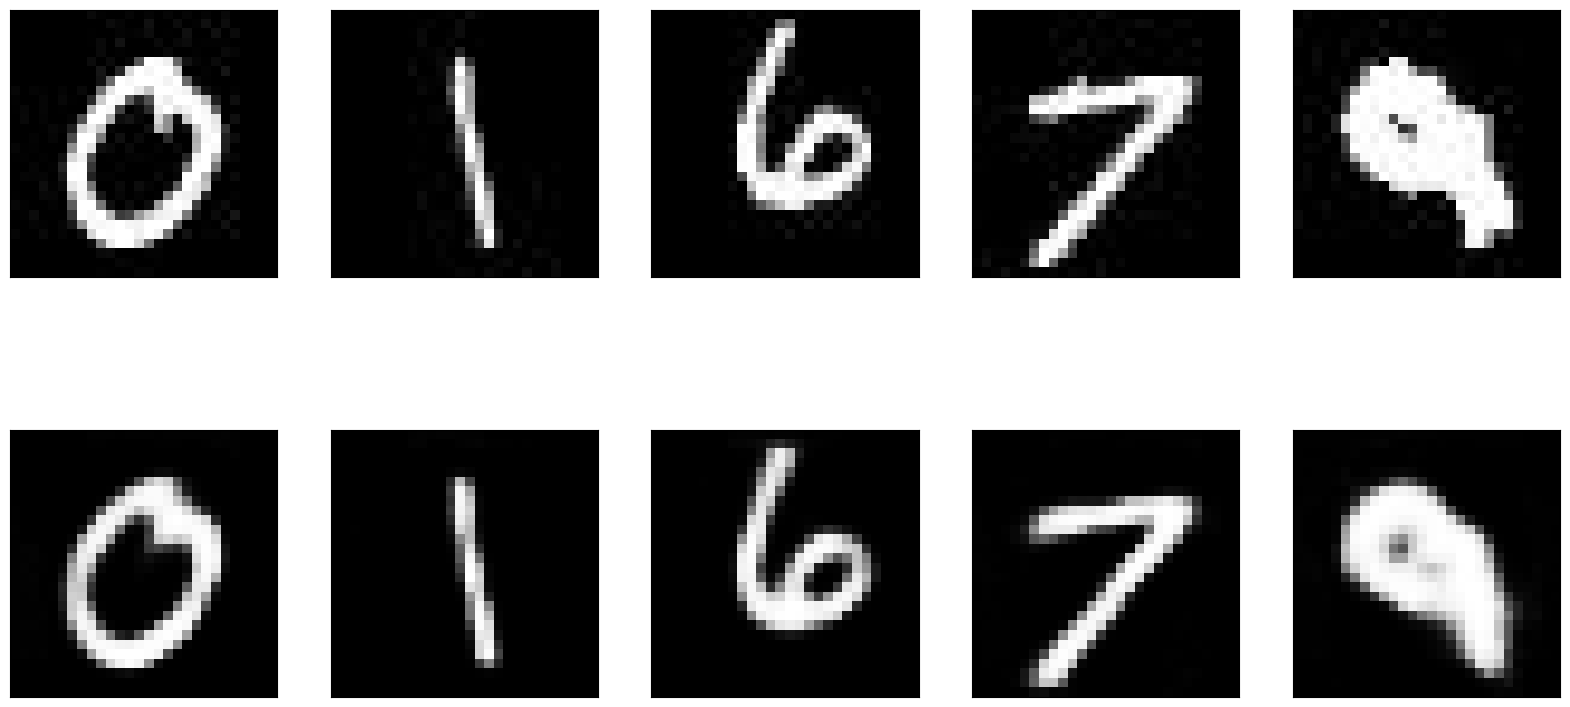

In [63]:
n=5
plt.figure(figsize=(20,10))
for i in range(n):
    #displaying original image
    #clss=n
    idx=np.where(Output_val==i)[0][0]
    ax=plt.subplot(2,n,i+1)
    plt.imshow(Input_val_Dataset[idx].reshape(28,28),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    #displaying reconstructed image
    ax=plt.subplot(2,n,i+1+n)
    plt.imshow(valReconstruct3[idx].reshape(28,28),cmap='gray')
    #plt.imshow(trainEncode[i].reshape(8,8),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

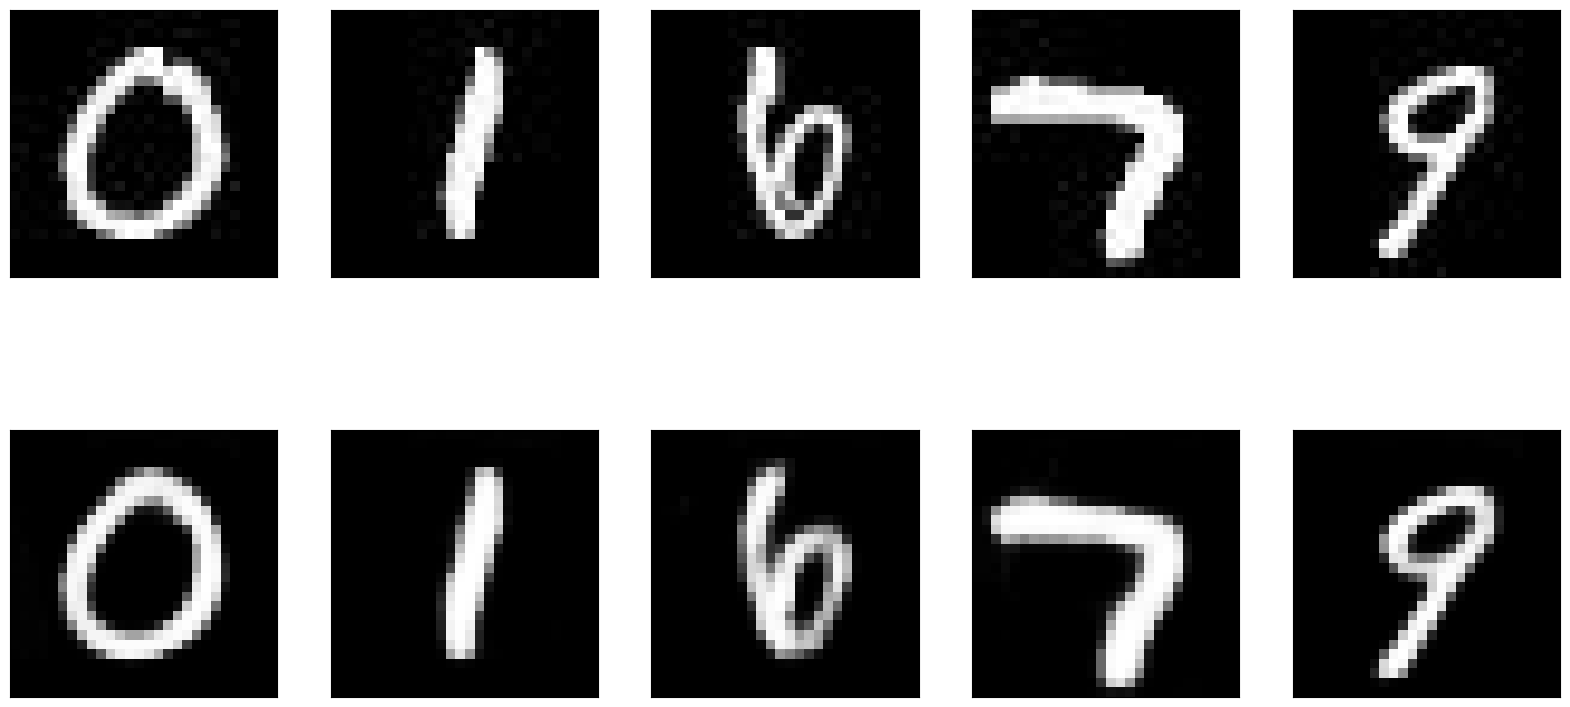

In [64]:
n=5
plt.figure(figsize=(20,10))
for i in range(n):
    #displaying original image
    #clss=n
    idx=np.where(Output_test==i)[0][0]
    ax=plt.subplot(2,n,i+1)
    plt.imshow(Input_test_Dataset[idx].reshape(28,28),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    #displaying reconstructed image
    ax=plt.subplot(2,n,i+1+n)
    plt.imshow(testReconstruct3[idx].reshape(28,28),cmap='gray')
    #plt.imshow(trainEncode[i].reshape(8,8),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

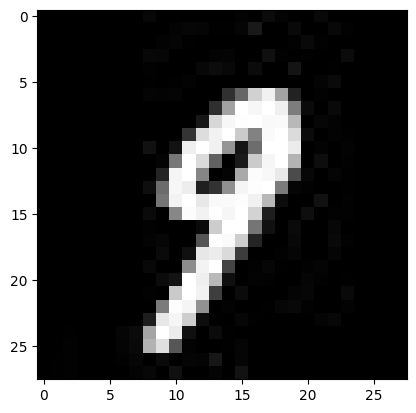

In [32]:
plt.imshow(Input_train_Dataset[0].reshape(28,28),cmap='gray')

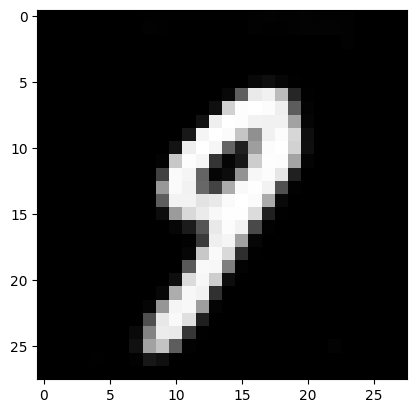

In [33]:
plt.imshow(trainReconstruct3[0].reshape(28,28),cmap='gray')

In [34]:
#Task3
#trainEncode=a1Encoder.predict(Input_train_Dataset)
'''Dataset used for prediction and evaluation in FCNN-Encoded data'''
trainEncode3=Encoder3.predict(Input_train_Dataset)
valEncode3=Encoder3.predict(Input_val_Dataset)
testEncode3=Encoder3.predict(Input_test_Dataset)

#Fcnn'''
model3 = keras.Sequential([
        #Flatten(input_shape=(28, 28), name='InputLayer'),
        Dense(1024, activation="sigmoid", name="Hlayer1",kernel_initializer=initializer, bias_initializer=initializers.Zeros()),
        Dense(512, activation="sigmoid", name="Hlayer2",kernel_initializer=initializer, bias_initializer=initializers.Zeros()),
        Dense(256, activation="sigmoid", name="Hlayer3",kernel_initializer=initializer, bias_initializer=initializers.Zeros()),
        Dense(5, activation="softmax", name="output"),
        ])
#model.summary()

adam =Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-8,name='Adam')


model3.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

es = EarlyStopping(monitor='loss',min_delta=0.0001, patience=3,verbose=1)

model_fit3 = model3.fit(x = trainEncode3, y = Output_train, batch_size = 32, epochs = 10000, verbose = "auto", callbacks=[es], validation_data=(valEncode3,  Output_val), validation_batch_size=1)

model3.save('/Users/vds/Downloads/modelAssign4/ae64.h5')
f=open('/Users/vds/Downloads/modelAssign4/Histae64.pckl','wb')
p.dump(model_fit3.history,f)
f.close()

119/119 [==============================] - 0s 930us/step
Epoch 1/10000
356/356 [==============================] - 7s 18ms/step - loss: 0.6225 - accuracy: 0.7535 - val_loss: 0.2599 - val_accuracy: 0.9070
Epoch 2/10000
356/356 [==============================] - 5s 15ms/step - loss: 0.1702 - accuracy: 0.9382 - val_loss: 0.1341 - val_accuracy: 0.9552
Epoch 3/10000
356/356 [==============================] - 5s 15ms/step - loss: 0.1487 - accuracy: 0.9482 - val_loss: 0.1307 - val_accuracy: 0.9528
Epoch 4/10000
356/356 [==============================] - 5s 14ms/step - loss: 0.1289 - accuracy: 0.9556 - val_loss: 0.1416 - val_accuracy: 0.9478
Epoch 5/10000
356/356 [==============================] - 5s 15ms/step - loss: 0.1189 - accuracy: 0.9584 - val_loss: 0.1165 - val_accuracy: 0.9615
Epoch 6/10000
356/356 [==============================] - 5s 15ms/step - loss: 0.1146 - accuracy: 0.9589 - val_loss: 0.1077 - val_accuracy: 0.9639
Epoch 7/10000
356/356 [==============================] - 5s 15ms/st

356/356 [==============================] - 5s 14ms/step - loss: 0.0162 - accuracy: 0.9939 - val_loss: 0.0647 - val_accuracy: 0.9829
Epoch 56/10000
356/356 [==============================] - 5s 14ms/step - loss: 0.0137 - accuracy: 0.9952 - val_loss: 0.0681 - val_accuracy: 0.9837
Epoch 57/10000
356/356 [==============================] - 5s 14ms/step - loss: 0.0173 - accuracy: 0.9931 - val_loss: 0.0656 - val_accuracy: 0.9823
Epoch 58/10000
356/356 [==============================] - 5s 14ms/step - loss: 0.0190 - accuracy: 0.9928 - val_loss: 0.0630 - val_accuracy: 0.9837
Epoch 59/10000
356/356 [==============================] - 5s 14ms/step - loss: 0.0148 - accuracy: 0.9947 - val_loss: 0.0528 - val_accuracy: 0.9855
Epoch 59: early stopping


In [35]:
#FCNN Error
print('\nEvaluation of model on train data:')
trainAcc3=model3.evaluate(x=trainEncode3,y=Output_train,batch_size=1, verbose="auto",callbacks=None)
print(model3.metrics_names)
print(trainAcc3)

print('\nEvaluation of model on validation data:')
valAcc3=model3.evaluate(x=valEncode3, y=Output_val, batch_size=1, verbose="auto",callbacks=None)
print(model3.metrics_names)
print(valAcc3)

print('\nEvaluation of model on test data:')
testAcc3=model3.evaluate(x=testEncode3, y=Output_test, batch_size=1, verbose="auto",callbacks=None)
print(model3.metrics_names)
print(testAcc3)

print('\nPredictions for test data:')
testProb3=model3.predict(testEncode3, batch_size=1, verbose="auto", callbacks=None)
pred3=np.argmax(testProb3,axis=1)
print(pred3)


Evaluation of model on train data:
11385/11385 [==============================] - 9s 798us/step - loss: 0.0087 - accuracy: 0.9973
['loss', 'accuracy']
[0.008700729347765446, 0.9972771406173706]

Evaluation of model on validation data:
3795/3795 [==============================] - 3s 793us/step - loss: 0.0528 - accuracy: 0.9855
['loss', 'accuracy']
[0.05278513953089714, 0.9855072498321533]

Evaluation of model on test data:
3795/3795 [==============================] - 3s 792us/step - loss: 0.0700 - accuracy: 0.9852
['loss', 'accuracy']
[0.07003182917833328, 0.9852437376976013]

Predictions for test data:
3795/3795 [==============================] - 3s 669us/step
[4 4 4 ... 1 1 1]


In [36]:
#3-3
#confusionMatrix=confusion_matrix(Output_test, pred)
confusionMatrix3=tf.math.confusion_matrix(Output_test,pred3)
#confusionMatrix=tf.math.confusion_matrix(Output_test, pred5)
print(confusionMatrix3)

tf.Tensor(
[[752   1   2   1   3]
 [  1 753   0   5   0]
 [  8   3 748   0   0]
 [  0   5   0 747   7]
 [  7   3   0  10 739]], shape=(5, 5), dtype=int32)


In [37]:
#print('Initializer: ',initializer)

def Upload_Dataset(Dataset_Path):
    
    Path_train_Dataset = Dataset_Path+"/train"
    Path_test_Dataset = Dataset_Path+"/test"
    Path_val_Dataset = Dataset_Path+"/val"
    
    Input_train_Dataset, Input_test_Dataset, Input_val_Dataset = [], [], []
    Output_train, Output_test, Output_val = [], [], []

    for j in os.listdir(Path_train_Dataset):

        if j != ".DS_Store":
            for k in os.listdir(Path_train_Dataset+"/"+j):
                Input_train_Dataset.append(cv2.imread(Path_train_Dataset+"/"+j+"/"+k, cv2.IMREAD_GRAYSCALE))
                if(j == '6'):
                    Output_train.append(int(2))
                elif(j == '7'):
                    Output_train.append(int(3))
                elif(j == '9'):
                    Output_train.append(int(4))
                else:
                    Output_train.append(int(j))

            for k in os.listdir(Path_test_Dataset+"/"+j):
                Input_test_Dataset.append(cv2.imread(Path_test_Dataset+"/"+j+"/"+k, cv2.IMREAD_GRAYSCALE))
                if(j=='6'):
                    Output_test.append(int(2))
                elif(j=='7'):
                    Output_test.append(int(3))
                elif(j=='9'):
                    Output_test.append(int(4))
                else:
                    Output_test.append(int(j))

            for k in os.listdir(Path_val_Dataset+"/"+j):
                Input_val_Dataset.append(cv2.imread(Path_val_Dataset+"/"+j+"/"+k, cv2.IMREAD_GRAYSCALE))
                if(j=='6'):
                    Output_val.append(int(2))
                elif(j=='7'):
                    Output_val.append(int(3))
                elif(j=='9'):
                    Output_val.append(int(4))
                else:
                    Output_val.append(int(j))
        
    #print(Output_train)            
    Input_train_Dataset, Input_test_Dataset, Input_val_Dataset = np.array(Input_train_Dataset), np.array(Input_test_Dataset), np.array(Input_val_Dataset)
    #Output_train, Output_test, Output_val = np.array(list(map(int, Output_train))), np.array(list(map(int, Output_test))), np.array(list(map(int, Output_val)))
    Output_train, Output_test, Output_val = np.array(Output_train), np.array(Output_test), np.array(Output_val)
    #print(Output_train) 
    return Input_train_Dataset, Input_test_Dataset,Input_val_Dataset, Output_train, Output_test, Output_val



#providing path of  MNIST dataset
Dataset_Path = "/Users/vds/Downloads/Group_1"

#calling Upload_Dataset function
Input_train_Dataset, Input_test_Dataset,Input_val_Dataset, Output_train, Output_test, Output_val= Upload_Dataset(Dataset_Path)

In [38]:
Input_train_Dataset=Input_train_Dataset/255
Input_test_Dataset=Input_test_Dataset/255
Input_val_Dataset=Input_val_Dataset/255
#bottleneck dimension
encodingDim4=32

In [39]:
#Autoencoder Arch-1
xInp4=Input(shape=(28,28),name="img")
inp4=Flatten(input_shape=(28, 28), name='InputLayer')(xInp4)

hl1a4=Dense(400,activation='sigmoid')(inp4)

encodedOut4=Dense(encodingDim4,activation='sigmoid')(hl1a4)

Encoder4=Model(xInp4,encodedOut4,name='encoder')

hl3a4=Dense(400,activation='sigmoid')(encodedOut4)

decodedOut4=Dense(784,activation='sigmoid')(hl3a4)

#encodedOut4=Dense(encodingDim3,activation='sigmoid')(inp4)

#Encoder4=Model(xInp4,encodedOut4,name='encoder')


#decodedOut4=Dense(784,activation='sigmoid')(encodedOut4)
out4=Reshape((28,28))(decodedOut4)
optimizer4=Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-6,name='Adam')

Autoencoder4=Model(xInp4,out4,name='AutoencoderA1')
Autoencoder4.summary()

es = EarlyStopping(monitor='loss',min_delta=0.0001, patience=3,verbose=1)

Autoencoder4.compile(optimizer4, loss='mse',metrics=['accuracy'])
ae4history=Autoencoder4.fit(x = Input_train_Dataset, y = Input_train_Dataset, batch_size = 32, epochs = 1000, verbose = "auto", callbacks=[es], validation_data=(Input_val_Dataset,  Input_val_Dataset))
#, validation_batch_size=1

Model: "AutoencoderA1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 28, 28)]          0         
                                                                 
 InputLayer (Flatten)        (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 400)               314000    
                                                                 
 dense_13 (Dense)            (None, 32)                12832     
                                                                 
 dense_14 (Dense)            (None, 400)               13200     
                                                                 
 dense_15 (Dense)            (None, 784)               314384    
                                                                 
 reshape_3 (Reshape)         (None, 28, 28)          

356/356 [==============================] - 3s 7ms/step - loss: 0.0064 - accuracy: 0.3460 - val_loss: 0.0072 - val_accuracy: 0.3405
Epoch 49/1000
356/356 [==============================] - 3s 7ms/step - loss: 0.0063 - accuracy: 0.3469 - val_loss: 0.0071 - val_accuracy: 0.3392
Epoch 50/1000
356/356 [==============================] - 3s 7ms/step - loss: 0.0063 - accuracy: 0.3466 - val_loss: 0.0071 - val_accuracy: 0.3411
Epoch 51/1000
356/356 [==============================] - 3s 7ms/step - loss: 0.0062 - accuracy: 0.3465 - val_loss: 0.0070 - val_accuracy: 0.3415
Epoch 52/1000
356/356 [==============================] - 3s 7ms/step - loss: 0.0061 - accuracy: 0.3473 - val_loss: 0.0070 - val_accuracy: 0.3424
Epoch 53/1000
356/356 [==============================] - 3s 7ms/step - loss: 0.0061 - accuracy: 0.3476 - val_loss: 0.0070 - val_accuracy: 0.3435
Epoch 54/1000
356/356 [==============================] - 3s 7ms/step - loss: 0.0060 - accuracy: 0.3480 - val_loss: 0.0069 - val_accuracy: 0.3435

In [40]:
#Reconstruction Error-2c
print('\nAverage reconstruction Loss :')
trainErr4=Autoencoder4.evaluate(x=Input_train_Dataset,y=Input_train_Dataset,batch_size=1, verbose="auto",callbacks=None)
print('Train Data:',trainErr4[0])

#print('\nEvaluation of model on validation data:')
valErr4=Autoencoder4.evaluate(x=Input_val_Dataset, y=Input_val_Dataset, batch_size=1, verbose="auto",callbacks=None)
print('Validation Data:',valErr4[0])

#print('\nEvaluation of model on test data: Average Reconstruction Error')
testErr4=Autoencoder4.evaluate(x=Input_test_Dataset, y=Input_test_Dataset, batch_size=1, verbose="auto",callbacks=None)
print('Test Data:',testErr4[0])


Average reconstruction Loss :
11385/11385 [==============================] - 11s 922us/step - loss: 0.0047 - accuracy: 0.3531
Train Data: 0.004675191827118397
3795/3795 [==============================] - 4s 993us/step - loss: 0.0059 - accuracy: 0.3462
Validation Data: 0.005919034592807293
3795/3795 [==============================] - 5s 1ms/step - loss: 0.0061 - accuracy: 0.3465
Test Data: 0.006137292832136154


356/356 [==============================] - 1s 2ms/step


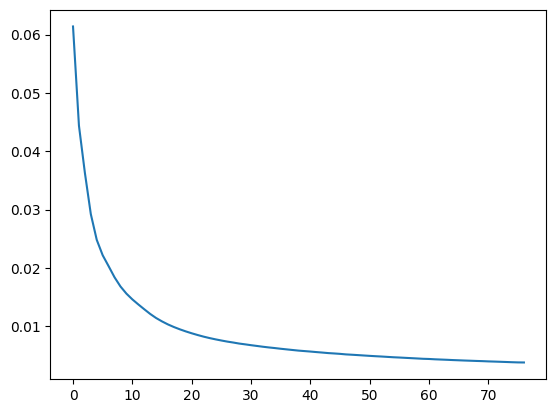

In [41]:
'''visualization-Task2-d'''
trainReconstruct4=Autoencoder4.predict(Input_train_Dataset)
plt.plot(ae3history.history['loss'])

In [126]:
'''visualization-Task2-d'''
trainReconstruct4=Autoencoder4.predict(Input_train_Dataset)
valReconstruct4=Autoencoder4.predict(Input_val_Dataset)
testReconstruct4=Autoencoder4.predict(Input_test_Dataset)

119/119 [==============================] - 0s 696us/step


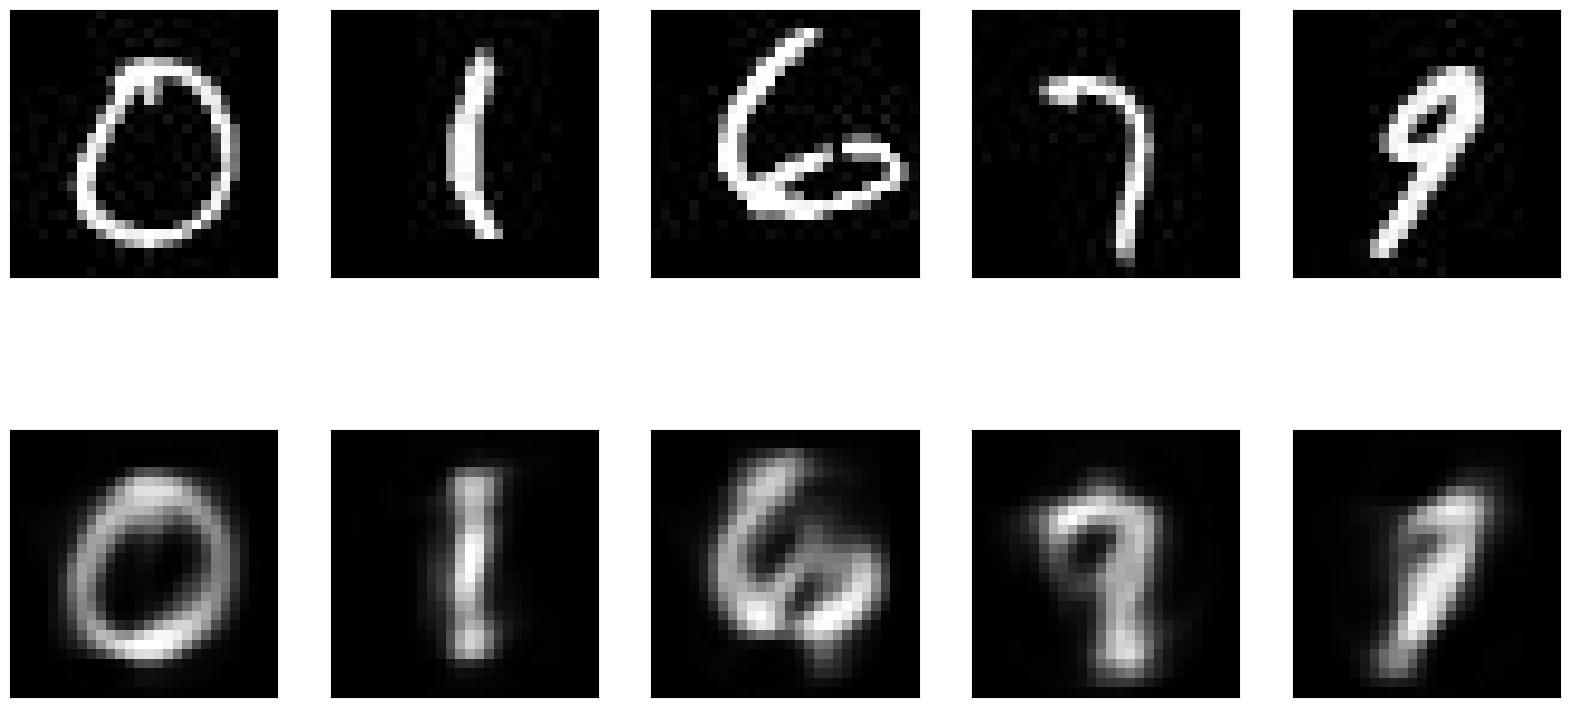

In [125]:
n=5
plt.figure(figsize=(20,10))
for i in range(n):
    #displaying original image
    #clss=n
    idx=np.where(Output_train==i)[0][0]
    ax=plt.subplot(2,n,i+1)
    plt.imshow(Input_train_Dataset[idx].reshape(28,28),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    #displaying reconstructed image
    ax=plt.subplot(2,n,i+1+n)
    plt.imshow(trainReconstruct4[idx].reshape(28,28),cmap='gray')
    #plt.imshow(trainEncode[i].reshape(8,8),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

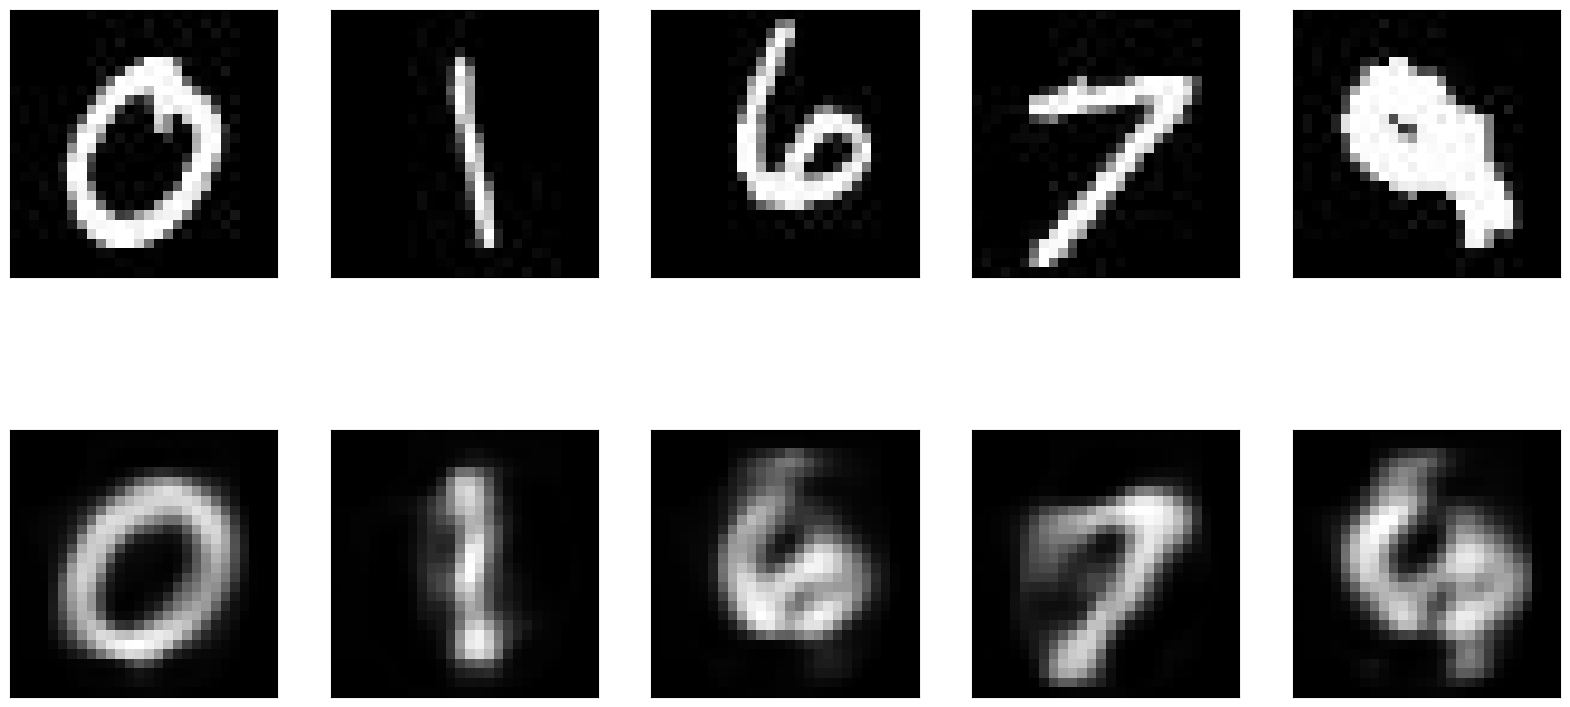

In [127]:
n=5
plt.figure(figsize=(20,10))
for i in range(n):
    #displaying original image
    #clss=n
    idx=np.where(Output_val==i)[0][0]
    ax=plt.subplot(2,n,i+1)
    plt.imshow(Input_val_Dataset[idx].reshape(28,28),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    #displaying reconstructed image
    ax=plt.subplot(2,n,i+1+n)
    plt.imshow(valReconstruct4[idx].reshape(28,28),cmap='gray')
    #plt.imshow(trainEncode[i].reshape(8,8),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

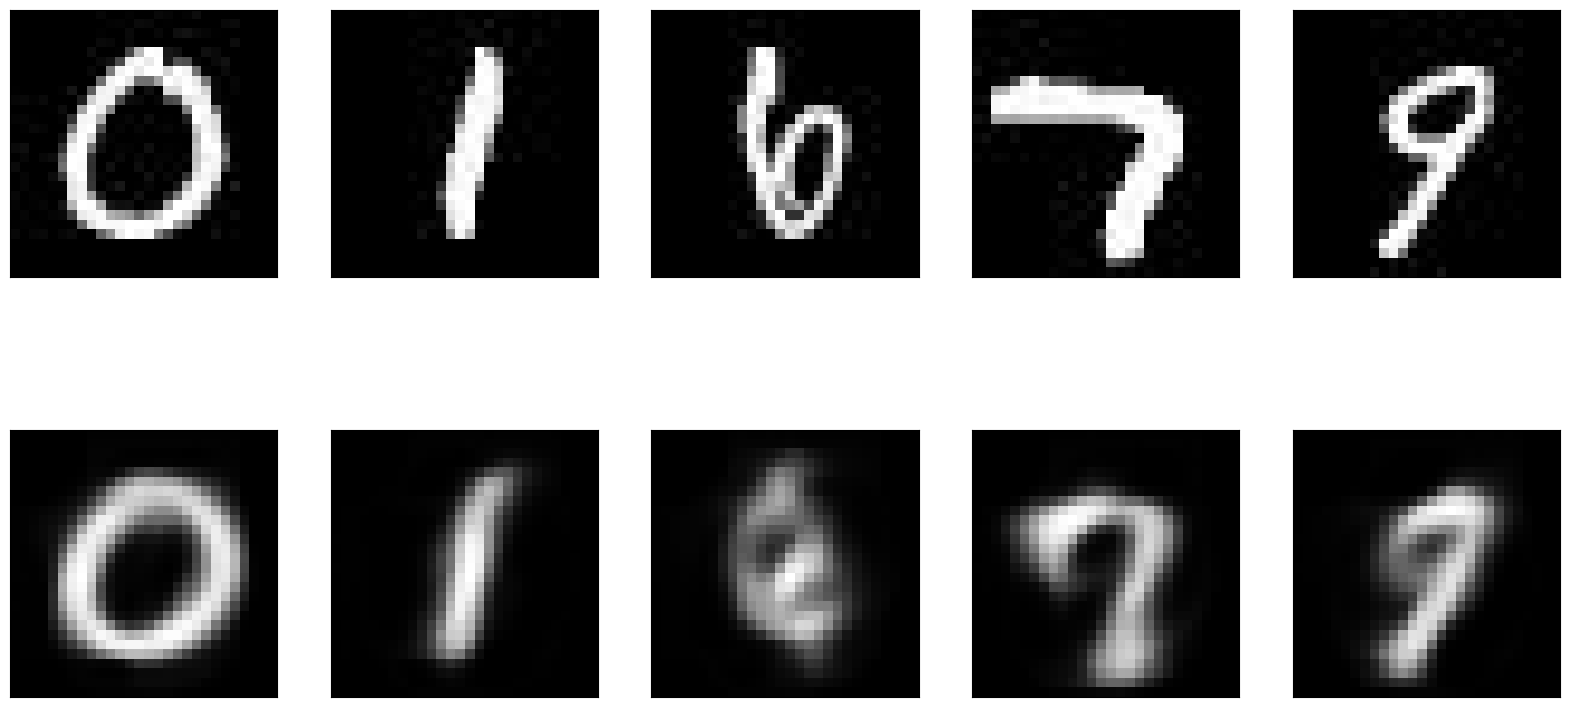

In [128]:
n=5
plt.figure(figsize=(20,10))
for i in range(n):
    #displaying original image
    #clss=n
    idx=np.where(Output_test==i)[0][0]
    ax=plt.subplot(2,n,i+1)
    plt.imshow(Input_test_Dataset[idx].reshape(28,28),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    #displaying reconstructed image
    ax=plt.subplot(2,n,i+1+n)
    plt.imshow(testReconstruct4[idx].reshape(28,28),cmap='gray')
    #plt.imshow(trainEncode[i].reshape(8,8),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

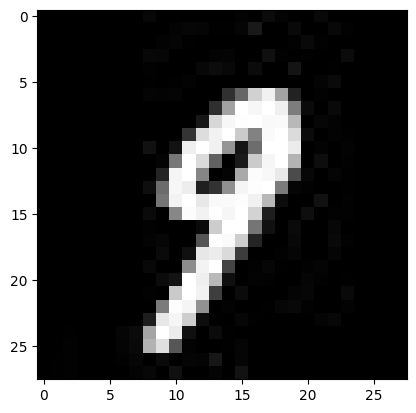

In [43]:
plt.imshow(Input_train_Dataset[0].reshape(28,28),cmap='gray')

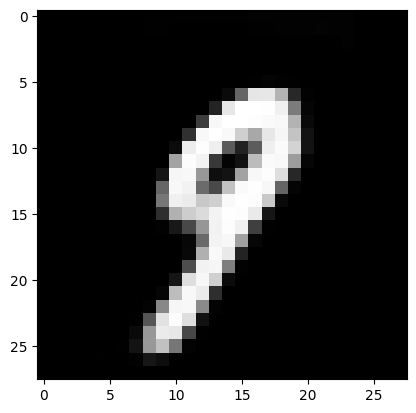

In [44]:
plt.imshow(trainReconstruct4[0].reshape(28,28),cmap='gray')

In [45]:
'''Task3'''
#trainEncode=a1Encoder.predict(Input_train_Dataset)
'''Dataset used for prediction and evaluation in FCNN-Encoded data'''
trainEncode4=Encoder4.predict(Input_train_Dataset)
valEncode4=Encoder4.predict(Input_val_Dataset)
testEncode4=Encoder4.predict(Input_test_Dataset)

'''Fcnn'''
model4 = keras.Sequential([
        #Flatten(input_shape=(28, 28), name='InputLayer'),
        Dense(1024, activation="sigmoid", name="Hlayer1",kernel_initializer=initializer, bias_initializer=initializers.Zeros()),
        Dense(512, activation="sigmoid", name="Hlayer2",kernel_initializer=initializer, bias_initializer=initializers.Zeros()),
        Dense(256, activation="sigmoid", name="Hlayer3",kernel_initializer=initializer, bias_initializer=initializers.Zeros()),
        Dense(5, activation="softmax", name="output"),
        ])
#model.summary()

adam =Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-8,name='Adam')


model4.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

es = EarlyStopping(monitor='loss',min_delta=0.0001, patience=3,verbose=1)

model_fit4 = model4.fit(x = trainEncode4, y = Output_train, batch_size = 32, epochs = 10000, verbose = "auto", callbacks=[es], validation_data=(valEncode4,  Output_val), validation_batch_size=1)

model4.save('/Users/vds/Downloads/modelAssign4/ae32.h5')
f=open('/Users/vds/Downloads/modelAssign4/Histae32.pckl','wb')
p.dump(model_fit4.history,f)
f.close()

119/119 [==============================] - 0s 1ms/step
Epoch 1/10000
356/356 [==============================] - 6s 15ms/step - loss: 0.8793 - accuracy: 0.6378 - val_loss: 0.2379 - val_accuracy: 0.9220
Epoch 2/10000
356/356 [==============================] - 5s 15ms/step - loss: 0.2176 - accuracy: 0.9226 - val_loss: 0.1750 - val_accuracy: 0.9375
Epoch 3/10000
356/356 [==============================] - 5s 15ms/step - loss: 0.1813 - accuracy: 0.9363 - val_loss: 0.1697 - val_accuracy: 0.9423
Epoch 4/10000
356/356 [==============================] - 5s 15ms/step - loss: 0.1728 - accuracy: 0.9396 - val_loss: 0.1886 - val_accuracy: 0.9344
Epoch 5/10000
356/356 [==============================] - 5s 14ms/step - loss: 0.1580 - accuracy: 0.9435 - val_loss: 0.1661 - val_accuracy: 0.9423
Epoch 6/10000
356/356 [==============================] - 5s 15ms/step - loss: 0.1593 - accuracy: 0.9425 - val_loss: 0.1464 - val_accuracy: 0.9502
Epoch 7/10000
356/356 [==============================] - 5s 15ms/step

356/356 [==============================] - 5s 14ms/step - loss: 0.0470 - accuracy: 0.9830 - val_loss: 0.0872 - val_accuracy: 0.9747
Epoch 56/10000
356/356 [==============================] - 5s 14ms/step - loss: 0.0462 - accuracy: 0.9830 - val_loss: 0.1003 - val_accuracy: 0.9739
Epoch 56: early stopping


In [46]:
#FCNN Error
print('\nEvaluation of model on train data:')
trainAcc4=model4.evaluate(x=trainEncode4,y=Output_train,batch_size=1, verbose="auto",callbacks=None)
print(model4.metrics_names)
print(trainAcc4)

print('\nEvaluation of model on validation data:')
valAcc4=model4.evaluate(x=valEncode4, y=Output_val, batch_size=1, verbose="auto",callbacks=None)
print(model4.metrics_names)
print(valAcc4)

print('\nEvaluation of model on test data:')
testAcc4=model4.evaluate(x=testEncode4, y=Output_test, batch_size=1, verbose="auto",callbacks=None)
print(model4.metrics_names)
print(testAcc4)

print('\nPredictions for test data:')
testProb4=model4.predict(testEncode4, batch_size=1, verbose="auto", callbacks=None)
pred4=np.argmax(testProb4,axis=1)
print(pred4)


Evaluation of model on train data:
11385/11385 [==============================] - 9s 784us/step - loss: 0.0481 - accuracy: 0.9829
['loss', 'accuracy']
[0.04814252629876137, 0.9828721880912781]

Evaluation of model on validation data:
3795/3795 [==============================] - 3s 904us/step - loss: 0.1003 - accuracy: 0.9739
['loss', 'accuracy']
[0.1002788096666336, 0.9739130139350891]

Evaluation of model on test data:
3795/3795 [==============================] - 4s 967us/step - loss: 0.0971 - accuracy: 0.9705
['loss', 'accuracy']
[0.09712149202823639, 0.9704874753952026]

Predictions for test data:
3795/3795 [==============================] - 3s 670us/step
[4 4 4 ... 1 1 1]


In [47]:
#3-3
#confusionMatrix=confusion_matrix(Output_test, pred)
confusionMatrix4=tf.math.confusion_matrix(Output_test,pred4)
#confusionMatrix=tf.math.confusion_matrix(Output_test, pred5)
print(confusionMatrix4)

tf.Tensor(
[[735   0   7  13   4]
 [  0 735  10  14   0]
 [  7   1 749   0   2]
 [  0   3   4 741  11]
 [  2   1   0  33 723]], shape=(5, 5), dtype=int32)
